## Problem Statement

- This project aims to develop a machine learning model that predicts employee attrition in a hospital setting, allowing for proactive retention strategies and improved workforce planning. The data consists of nearly 1,500 current and former employees with information related to their job satisfaction, work life balance, tenure, experience, salary, and demographic data. Below is a brief overview and summary statistics of the data.

!pip install --upgrade matplotlib seaborn

In [1]:
## Import libraries
import pandas as pd
import numpy as np

# for visuals
import seaborn as sns
import matplotlib.pyplot as  plt

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
# import and read file
df1 = pd.read_csv(r"C:\Users\pc\Downloads\watson_healthcare_modified.csv")
df1.head(5)

EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0     1313919   41        No      Travel_Rarely       1102  Cardiology   
1     1200302   49        No  Travel_Frequently        279   Maternity   
2     1060315   37       Yes      Travel_Rarely       1373   Maternity   
3     1272912   33        No  Travel_Frequently       1392   Maternity   
4     1414939   27        No      Travel_Rarely        591   Maternity   

   DistanceFromHome  Education EducationField  EmployeeCount  ...  \
0                 1          2  Life Sciences              1  ...   
1                 8          1  Life Sciences              1  ...   
2                 2          2          Other              1  ...   
3                 3          4  Life Sciences              1  ...   
4                 2          1        Medical              1  ...   

   RelationshipSatisfaction StandardHours  Shift  TotalWorkingYears  \
0                         1            80      0                  8   
1                         4            80      1                 10   
2                         2            80      0                  7   
3                         3            80      0                  8   
4                         4            80      1                  6   

   TrainingTimesLastYear WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                      0               1               6                  4   
1                      3               3              10                  7   
2                      3               3               0                  0   
3                      3               3               8                  7   
4                      3               3               2                  2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 35 columns]

In [3]:
#making a copy of the original data
df = df1.copy()
df.head(2)

EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0     1313919   41        No      Travel_Rarely       1102  Cardiology   
1     1200302   49        No  Travel_Frequently        279   Maternity   

   DistanceFromHome  Education EducationField  EmployeeCount  ...  \
0                 1          2  Life Sciences              1  ...   
1                 8          1  Life Sciences              1  ...   

   RelationshipSatisfaction StandardHours  Shift  TotalWorkingYears  \
0                         1            80      0                  8   
1                         4            80      1                 10   

   TrainingTimesLastYear WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                      0               1               6                  4   
1                      3               3              10                  7   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  

[2 rows x 35 columns]

## Data Inspection

In [4]:
# shape of dataset
df.shape

(1676, 35)

In [5]:
# check columns
df.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# The info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [7]:
# check for duplicates
df.duplicated().sum()

0

## Data Preprocessing

In [8]:
# extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64']) 
# confirm if there are negative for each columns
num_vars_negative = (num_vars < 0).sum()

print(num_vars_negative)
# in a situation where you have negative where it ought not to be, you will use .replace to zero() 
#it depends on the domain or the values i'm working with 

EmployeeID                  0
Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [9]:
# value counts for numerical variables
for column in num_vars:
    print(df[column].value_counts())

EmployeeID
1313919    1
1604086    1
1788553    1
1638427    1
1828789    1
          ..
1446447    1
1446990    1
1639147    1
1855799    1
1152329    1
Name: count, Length: 1676, dtype: int64
Age
35    88
34    85
29    82
31    82
36    81
32    68
38    68
40    64
30    63
33    62
28    59
27    59
37    57
42    52
39    47
26    46
45    45
41    43
46    38
43    37
44    36
50    33
25    30
49    29
24    29
47    28
55    25
53    25
48    23
52    21
54    20
51    20
22    18
23    17
58    17
56    15
21    14
20    13
19    10
59    10
18     8
60     5
57     4
Name: count, dtype: int64
DailyRate
691     7
1329    7
1082    6
444     6
530     6
       ..
1126    1
974     1
905     1
1151    1
1102    1
Name: count, Length: 886, dtype: int64
DistanceFromHome
2     241
1     239
10     99
3      96
7      95
9      93
8      89
5      76
6      72
4      69
16     38
24     34
29     33
23     33
11     33
25     29
15     29
26     28
18     28
19     27
28     27
20 

In [10]:
# select categorical variables
cat_vars = df.select_dtypes(include = ['object']).columns.tolist()
print(cat_vars)

# value counts for categorical variables
for column in cat_vars:
    print(df[column].value_counts())

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Attrition
No     1477
Yes     199
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: count, dtype: int64
Department
Maternity     796
Cardiology    531
Neurology     349
Name: count, dtype: int64
EducationField
Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: count, dtype: int64
Gender
Male      998
Female    678
Name: count, dtype: int64
JobRole
Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: count, dtype: int64
MaritalStatus
Married     777
Single      522
Divorced    377
Name: count, dtype: int64
Over18
Y    1676
Name: count, dtype: int64
OverTime
No     1200
Yes     476
Name: count, dtype: int64


EmployeeID                    0
Age                           0
DailyRate                     0
DistanceFromHome              0
Education                     0
EmployeeCount                 0
EnvironmentSatisfaction       0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobSatisfaction               0
MonthlyIncome               132
MonthlyRate                   0
NumCompaniesWorked           59
PercentSalaryHike             0
PerformanceRating           252
RelationshipSatisfaction      0
StandardHours                 0
Shift                        99
TotalWorkingYears            75
TrainingTimesLastYear       271
WorkLifeBalance               0
YearsAtCompany               76
YearsInCurrentRole           24
YearsSinceLastPromotion     125
YearsWithCurrManager         15
dtype: int64


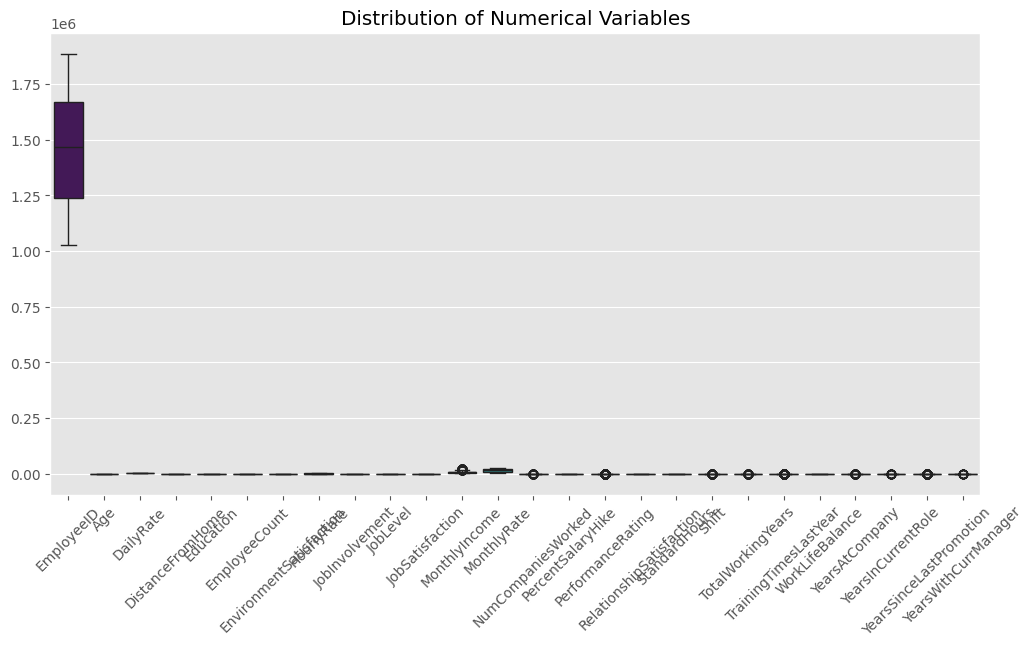

In [11]:
# Extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of outliers for each numerical variable
outliers_count = ((num_vars < num_vars.quantile(0.25) - 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))) |
                  (num_vars > num_vars.quantile(0.75) + 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))))
outliers_count = outliers_count.sum()

# Display the number of outliers in a table
print(outliers_count)

# Create a boxplot to show the distribution of each numerical variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

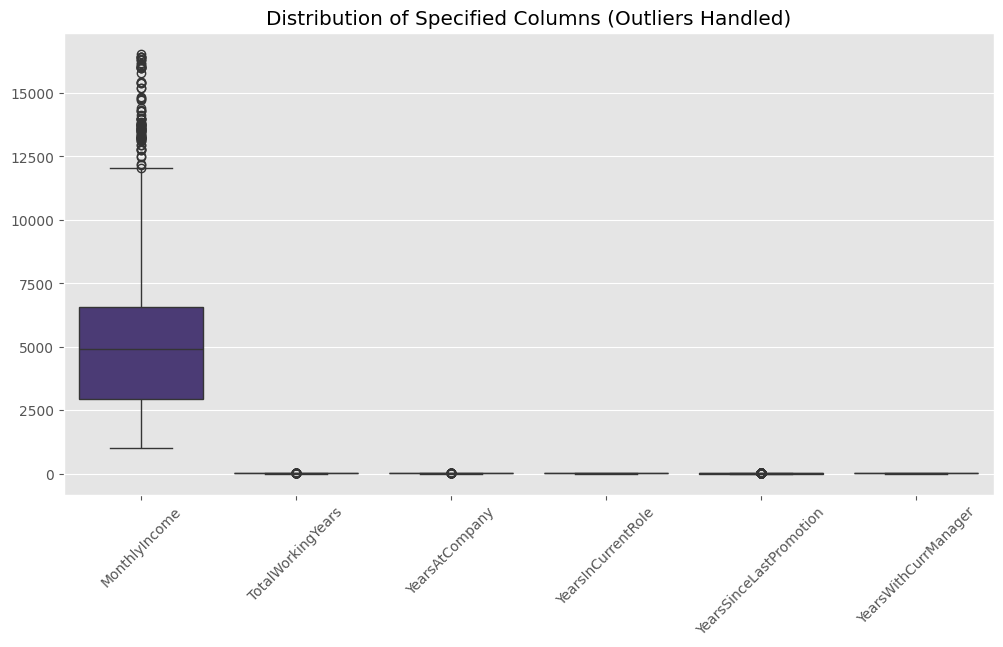

In [12]:
# List of columns to handle outliers
columns_to_handle = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Calculate the median for each specified column
medians = df[columns_to_handle].median()

# Replace outliers with the median of each variable
for column in columns_to_handle:
    q1 = df[column].quantile(0.25)  # First quartile
    q3 = df[column].quantile(0.75)  # Third quartile
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = df[column].apply(
        lambda x: medians[column] if x < lower_bound or x > upper_bound else x
    )

# Create a boxplot to show the distribution of each specified column after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_handle], palette='viridis')
plt.title('Distribution of Specified Columns (Outliers Handled)')
plt.xticks(rotation=45)
plt.show()

In [13]:
df.to_csv('df.csv', index=False)

In [14]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

df.describe().astype('int')

EmployeeID   Age  DailyRate  DistanceFromHome  Education  \
count        1676  1676       1676              1676       1676   
mean      1456795    36        800                 9          2   
std        248748     9        401                 8          1   
min       1025177    18        102                 1          1   
25%       1235831    30        465                 2          2   
50%       1464606    36        796                 7          3   
75%       1667992    43       1157                14          4   
max       1886378    60       1499                29          5   

       EmployeeCount  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count           1676                     1676        1676            1676   
mean               1                        2          65               2   
std                0                        1          20               0   
min                1                        1          30               1   
25%                1                        2          48               2   
50%                1                        3          65               3   
75%                1                        4          83               3   
max                1                        4         100               4   

       JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
count      1676             1676           1676         1676   
mean          2                2           5452        14287   
std           1                1           3194         7138   
min           1                1           1009         2094   
25%           1                2           2928         7993   
50%           2                3           4898        14269   
75%           3                4           6579        20462   
max           5                4          16555        26999   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count                1676               1676               1676   
mean                    2                 15                  3   
std                     2                  3                  0   
min                     0                 11                  3   
25%                     1                 12                  3   
50%                     2                 14                  3   
75%                     4                 18                  3   
max                     9                 25                  4   

       RelationshipSatisfaction  StandardHours  Shift  TotalWorkingYears  \
count                      1676           1676   1676               1676   
mean                          2             80      0                 10   
std                           1              0      0                  6   
min                           1             80      0                  0   
25%                           2             80      0                  6   
50%                           3             80      1                 10   
75%                           4             80      1                 13   
max                           4             80      3                 28   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count                   1676             1676            1676   
mean                       2                2               6   
std                        1                0               4   
min                        0                1               0   
25%                        2                2               3   
50%                        3                3               5   
75%                        3                3               9   
max                        6                4              20   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count                1676                     1676                  1676  
mean                    4                        1                     4  
std                     3       

## Exploratory Data Analysis

- Univariate Analysis

In [15]:
num_vars.columns

Index(['EmployeeID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Skewness for specified columns:
Age: 0.42
DailyRate: 0.00
DistanceFromHome: 0.95
HourlyRate: -0.01
MonthlyIncome: 1.30
MonthlyRate: 0.01
NumCompaniesWorked: 1.05
PercentSalaryHike: 0.82
Shift: 0.95
TotalWorkingYears: 0.80
TrainingTimesLastYear: 0.54
YearsAtCompany: 1.10
YearsInCurrentRole: 0.68
YearsSinceLastPromotion: 1.66
YearsWithCurrManager: 0.65
PerformanceRating: 1.96


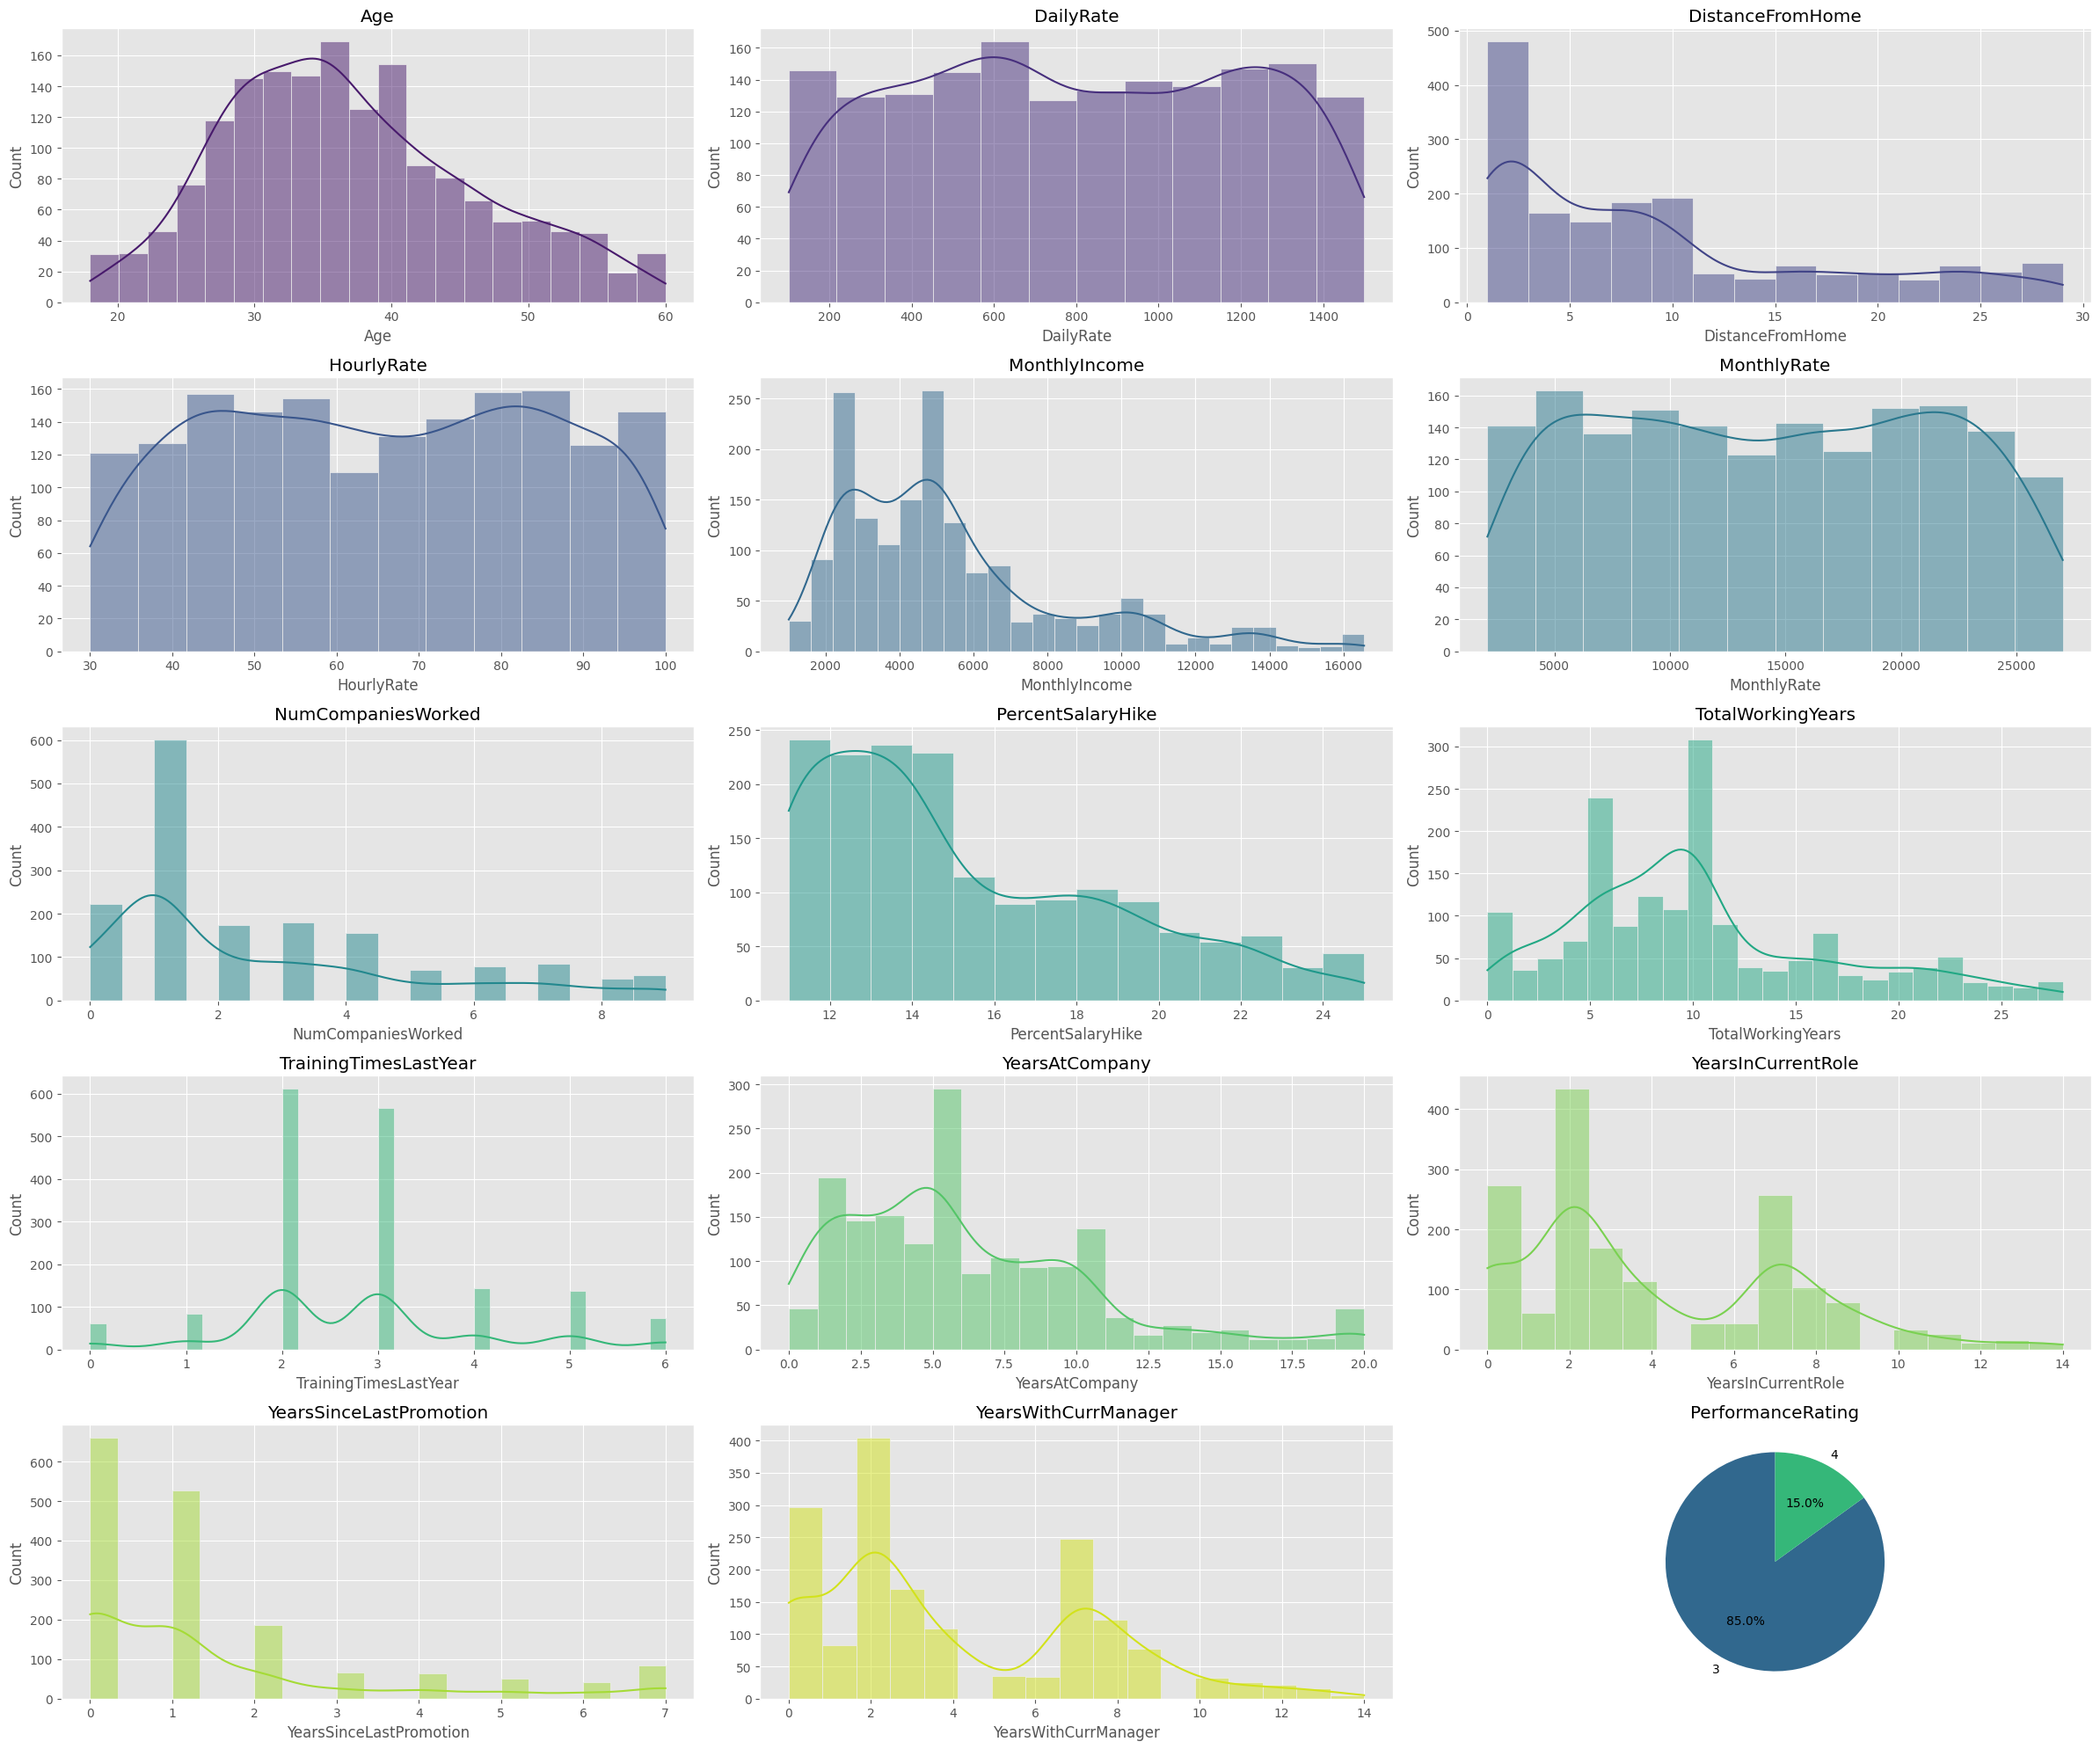

In [16]:
# List of numerical columns for which to calculate skewness
numerical_columns = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'Shift',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 
    'PerformanceRating'
]

# Calculate skewness for each specified column
skewness_results = {col: df[col].skew() for col in numerical_columns}

# Print skewness results in a readable format
print("Skewness for specified columns:")
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness:.2f}")  # Display skewness with 2 decimal places
    
# Define the columns for histograms and the pie chart
hist_columns = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

pie_column = 'PerformanceRating'

# Determine the number of rows and columns for subplots
total_subplots = len(hist_columns) + 1  # Including the pie chart
num_rows = (total_subplots + 2) // 3  # Number of rows based on total subplots
num_cols = min(3, total_subplots)  # Maximum 3 columns

# Create larger subplots with given rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 20))  # Larger size
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Set color palette to 'viridis'
viridis_palette = sns.color_palette("viridis", len(hist_columns))

# Create histograms for each specified column with the 'viridis' palette
for i, col in enumerate(hist_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color=viridis_palette[i % len(viridis_palette)])  # Color for the histograms
    axes[i].set_title(col)  # Set the title to the column name

# Create a pie chart for 'PerformanceRating'
pie_data = df[pie_column].value_counts()
axes[len(hist_columns)].pie(
    pie_data,
    labels=pie_data.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("viridis", len(pie_data))
)
axes[len(hist_columns)].set_title(pie_column)  # Set the title to 'PerformanceRating'

# Hide any extra axes
for ax in axes[len(hist_columns) + 1:]:  # Start from the first unused axis
    ax.axis('off')  # Hide the unused axes

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

**This chart offers a fascinating glimpse into an health-care, HR Sector. Let's dive into some key findings:**

The workforce is predominantly made up of individuals in their late 20s to early 40s. They bring valuable experience and are likely at a stage in their careers where they're seeking growth and stability.
Compensation reflects this experience, with hourly rates ranging from $42 to $96, translating to monthly incomes that can reach over $22,000.
Most employees live relatively close by, commuting between 1 and 10 kilometers to the office. This suggests a good work-life balance for many.

- Experience and Growth:
It appears a large portion of our talent has been with only one company previously. This loyalty is commendable, and understanding their motivations can help us retain them.
We see a trend of employees staying with us for 2-4 years after joining, with those who stay 5-9 years being less common. This might be an area to explore for potential improvement in employee retention strategies.

- Skilling Up and Moving Up:
We're fostering a culture of continuous learning, with two training sessions being the most common frequency in the past year. This investment in employee development is crucial for staying competitive.
Interestingly, over **60% of employees haven't received a promotion in the past year.**

- Leadership and Performance:
"Excellent" performance is the most frequent rating, showcasing a strong and dedicated workforce.
Most employees have been with their current manager for two years or haven't had a change in manager. This suggests consistency and potentially strong relationships within teams.

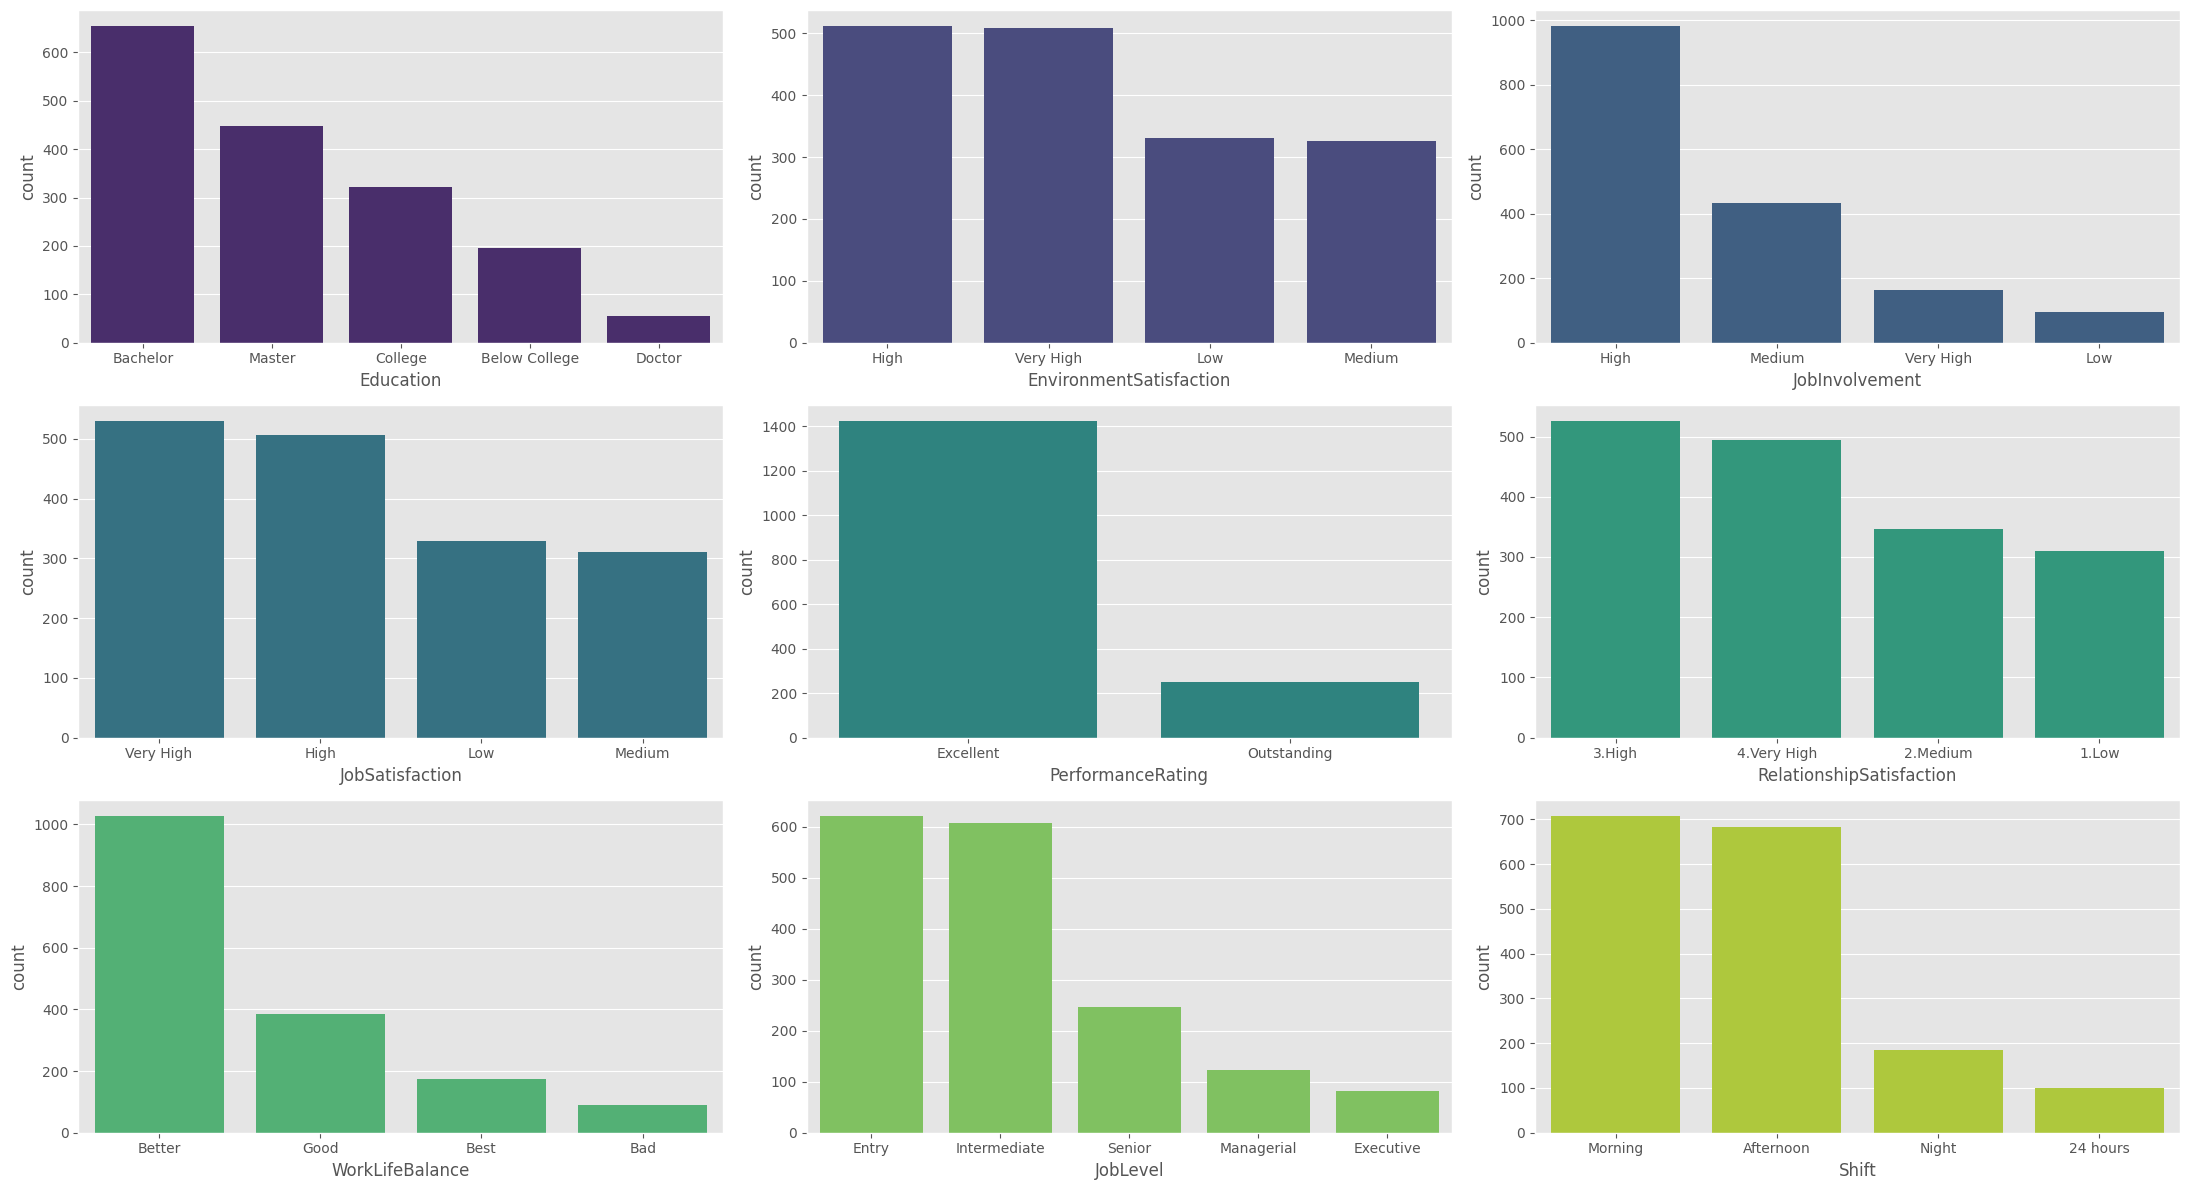

In [17]:
# Dictionary for label mapping
label_dict = {
    'Education': {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'},
    'EnvironmentSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'JobInvolvement': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'JobSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'PerformanceRating': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'},
    'RelationshipSatisfaction': {1: '1.Low', 2: '2.Medium', 3: '3.High', 4: '4.Very High'},
    'WorkLifeBalance': {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'},
    'JobLevel': {1: 'Entry', 2: 'Intermediate', 3: 'Senior', 4: 'Managerial', 5: 'Executive'},
    'Shift':{0: 'Morning', 1: 'Afternoon', 2: 'Night', 3: '24 hours' }
}

# Apply label mapping to convert numerical codes to descriptive labels
for column, mapping in label_dict.items():
    df[column] = df[column].map(mapping)

# Set the color palette
viridis_palette = sns.color_palette('viridis', len(label_dict))

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(3, 3, figsize=(22, 12))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Subset for plotting
sub_numerical_column = ('Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                        'JobSatisfaction', 'PerformanceRating', 
                        'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel', 'Shift')

# Plot each count plot with x-axis sorted by count in descending order
for i, column in enumerate(sub_numerical_column):
    # Get the sorted order based on counts in descending order
    sorted_order = df[column].value_counts().sort_values(ascending=False).index
    
    # Plot with the sorted order and the specified color
    sns.countplot(x=column, data=df, ax=axes[i], order=sorted_order, color=viridis_palette[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

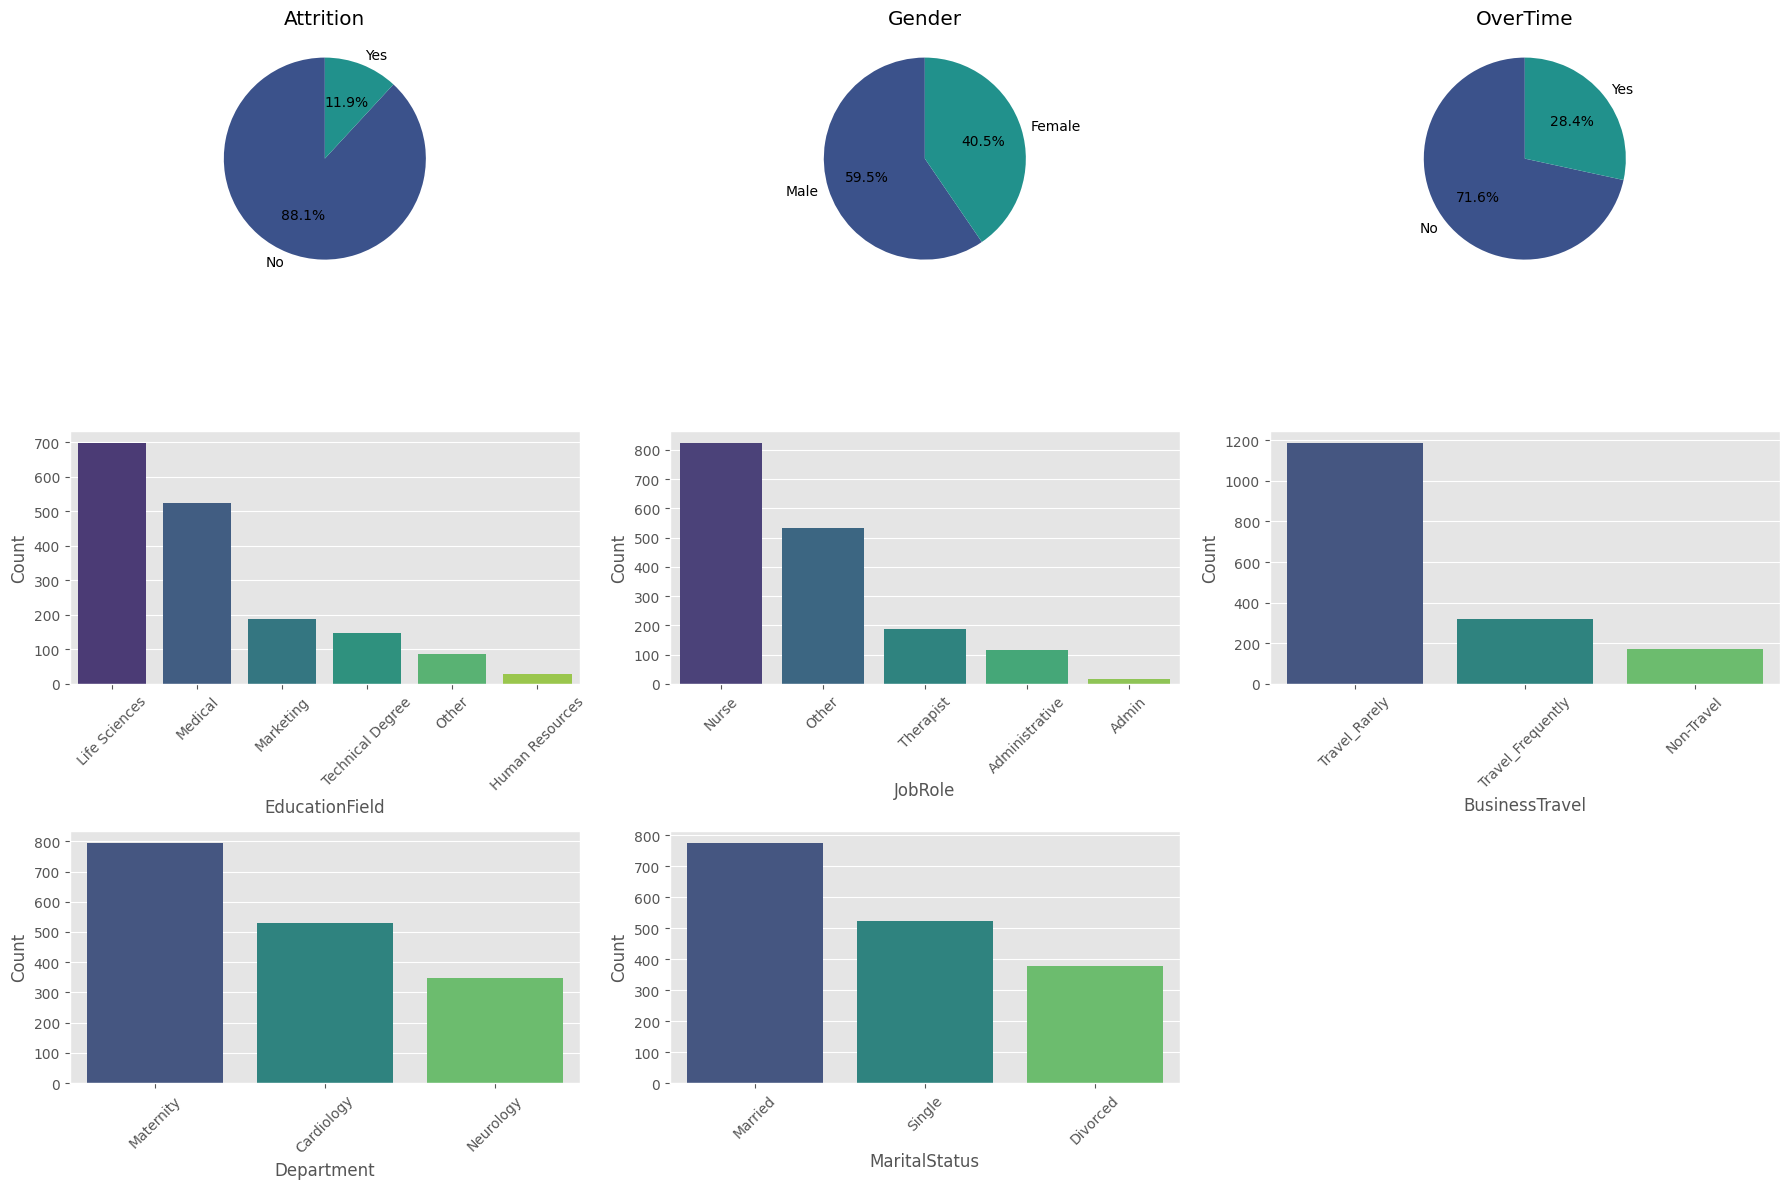

In [18]:
# List of categorical columns to create subplots for
cat_vars_pie = ['Attrition', 'Gender', 'OverTime']
cat_vars_bar = ['EducationField', 'JobRole', 'BusinessTravel', 'Department', 'MaritalStatus']

# Create subplots for pie charts and bar charts
total_charts = len(cat_vars_pie) + len(cat_vars_bar)
num_rows = (total_charts + 2) // 3  # Layout adjustment
num_cols = min(3, total_charts)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
axes = axes.flatten()

# Create pie charts with 'viridis' color palette
custom_pie_palette = sns.color_palette("viridis", n_colors=len(cat_vars_pie))
for i, var in enumerate(cat_vars_pie):
    pie_data = df[var].value_counts()
    axes[i].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=custom_pie_palette)
    axes[i].set_title(f'{var}')

# Create bar charts with 'deep' color palette
for j, var in enumerate(cat_vars_bar):
    index = len(cat_vars_pie) + j  # Correct index
    bar_data = df[var].value_counts()
    sns.barplot(x=bar_data.index, y=bar_data.values, ax=axes[index], palette= 'viridis')
    axes[index].set_ylabel('Count')
    axes[index].tick_params(axis='x', rotation=45)
    
# Hide the last subplot if not needed (since we have 8 count plots, but 9 subplots)
axes[-1].axis('off')  # Hide the extra subplot if not needed
    
# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

- The good news: the majority of the employees (88.1%) choose to stay with the organisation! This strong retention rate indicates a positive work environment that fosters loyalty.

- Workforce Composition
the team appears to have a higher proportion of males compared to females. Additionally, Life Sciences is the most common educational background, followed by Medical, Marketing, Technical, and Human Resources. Understanding these demographics can help tailor engagement initiatives for different groups.

- A Stable Core and Diverse Roles
Over 71.6% of employees have stayed for a long period, suggesting a stable core workforce. Regarding job roles, Nurses represent the largest group, followed by others, Therapists, Administrative staff, and Admin

- Travel and Location:
Most employees (almost 1200) travel rarely for work. The Maternity ward has the highest number of staff, followed by Cardiology and Neurology departments.  Optimizing scheduling and workload distribution can be particularly important for departments with high staff counts.

- Building a Strong Community
All employees are confirmed to be over 18 years old. Married employees make up the largest group, followed by single and then divorced employees.  Understanding the demographics of the staff can help to foster a sense of community that caters to diverse needs.

### Bivariate Analysis

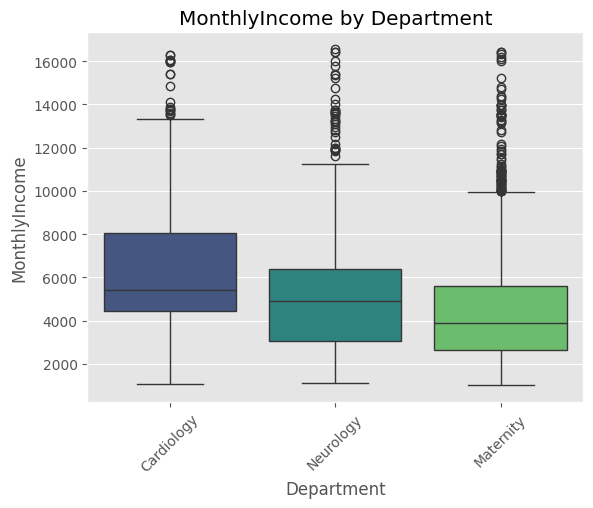

In [19]:
# Calculate the average 'MonthlyIncome' for each 'Department'
avg_income_by_department = df.groupby('Department')['MonthlyIncome'].mean()

# Sort the 'Department' by average 'MonthlyIncome' in descending order
ordered_departments = avg_income_by_department.sort_values(ascending=False).index

# Create a box plot with departments in descending order by average 'MonthlyIncome'
sns.boxplot(data=df, x='Department', y='MonthlyIncome', order=ordered_departments, palette='viridis')

# Set plot title and rotate x-axis labels for readability
plt.title("MonthlyIncome by Department")
plt.xticks(rotation=45)  # Rotate x-axis labels

# Show the plot
plt.show()

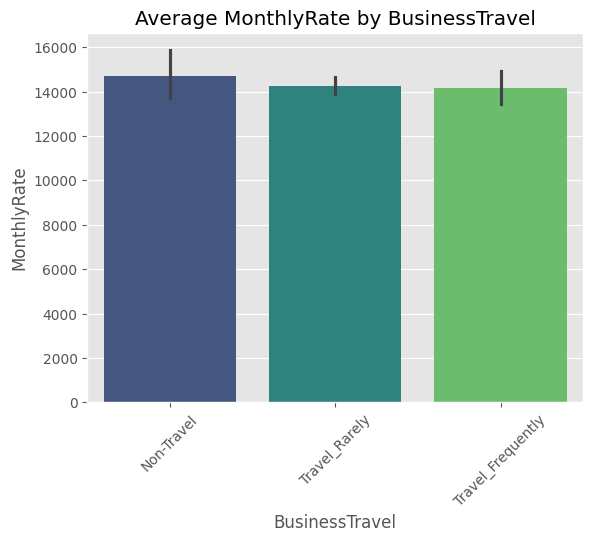

In [20]:
# Calculate the average 'MonthlyRate' for each 'BusinessTravel' category
avg_rate_by_travel = df.groupby('BusinessTravel')['MonthlyRate'].mean()

# Sort 'BusinessTravel' categories by average 'MonthlyRate' in descending order
ordered_travel = avg_rate_by_travel.sort_values(ascending=False).index

# Create a bar plot with 'BusinessTravel' sorted by average 'MonthlyRate' in descending order
sns.barplot(data=df, x='BusinessTravel', y='MonthlyRate', order=ordered_travel, palette='viridis')

# Set plot title and rotate x-axis labels by 45 degrees for readability
plt.title("Average MonthlyRate by BusinessTravel")
plt.xticks(rotation=45)

# Show the plot
plt.show()

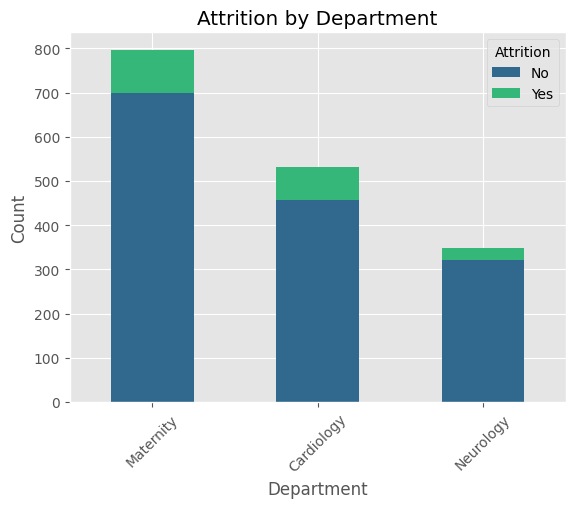

In [21]:
# Create a crosstab to get counts of Attrition by Department
attrition_by_department = pd.crosstab(df['Department'], df['Attrition'])

# Sort 'Department' by the count of 'Yes' in descending order
ordered_departments = attrition_by_department['Yes'].sort_values(ascending=False).index

# Define colors for 'Yes' and 'No' categories using 'viridis' palette
colors = sns.color_palette('viridis', n_colors=2)  # Two colors from 'viridis'

# Create a stacked bar chart with departments sorted by the count of 'Yes' in descending order
attrition_by_department.loc[ordered_departments].plot(kind='bar', stacked=True, color=colors)

# Set plot title, axis labels, and legend
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])

# Rotate x-axis labels to 45 degrees for readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

**The chart illustrates employee attrition rates by department. The Maternity department has the highest overall attrition rate (100 employees), followed by Cardiology (50 employees) and Neurology (20 employees)**

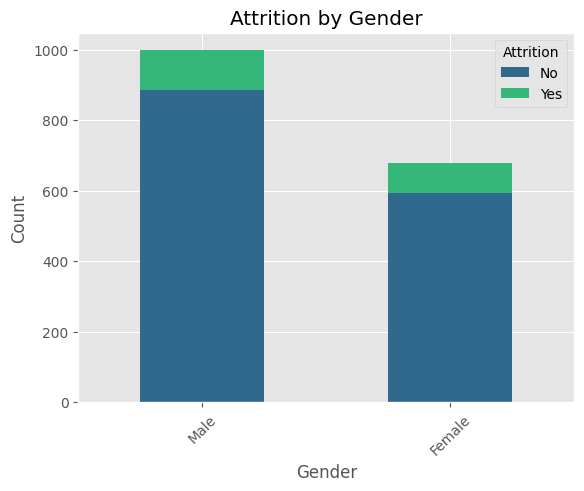

In [22]:
# Create a crosstab to get counts of Attrition by Gender
attrition_by_gender = pd.crosstab(df['Gender'], df['Attrition'])

# Sort 'Gender' by the count of 'Yes' in descending order
ordered_genders = attrition_by_gender['Yes'].sort_values(ascending=False).index

# Define colors for 'Yes' and 'No' categories using 'viridis' palette
colors = sns.color_palette('viridis', 2)

# Create a stacked bar chart with 'Gender' sorted by the count of 'Yes' in descending order
attrition_by_gender.loc[ordered_genders].plot(kind='bar', stacked=True, color=colors)

# Set plot title, axis labels, and legend
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])

# Rotate x-axis labels to 45 degrees for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

**This chart analyzes the relationship between employee gender and attrition rate. It highlights that males have a higher attrition rate compared to females. The data indicates there are more than 100 male employees left the company, while the attrition rate for females is lower than 100.**

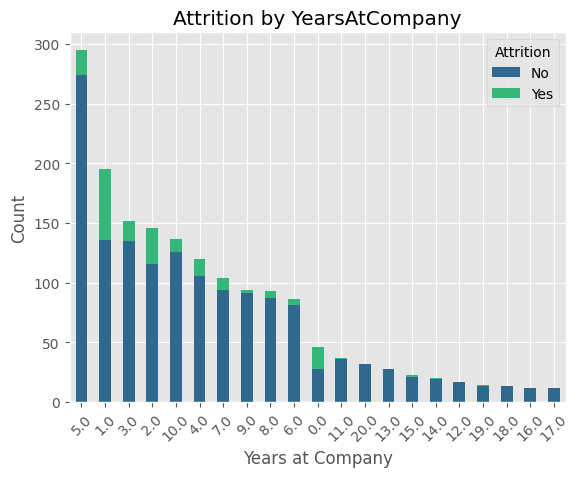

In [23]:
# Create a crosstab to get counts of Attrition by 'YearsAtCompany'
attrition_by_year = pd.crosstab(df['YearsAtCompany'], df['Attrition'])

# Calculate the total attrition count for each 'YearsAtCompany'
attrition_by_year['Total'] = attrition_by_year['Yes'] + attrition_by_year['No']

# Sort 'YearsAtCompany' by the total attrition count in descending order
ordered_years = attrition_by_year['Total'].sort_values(ascending=False).index

# Define colors for 'Yes' and 'No' using 'viridis' palette
colors = sns.color_palette('viridis', 2)  # Two colors for 'Yes' and 'No'

# Create a stacked bar chart with sorted 'YearsAtCompany' in descending order
attrition_by_year.loc[ordered_years].drop(columns='Total').plot(kind='bar', stacked=True, color=colors)

# Set plot title, axis labels, and legend
plt.title('Attrition by YearsAtCompany')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

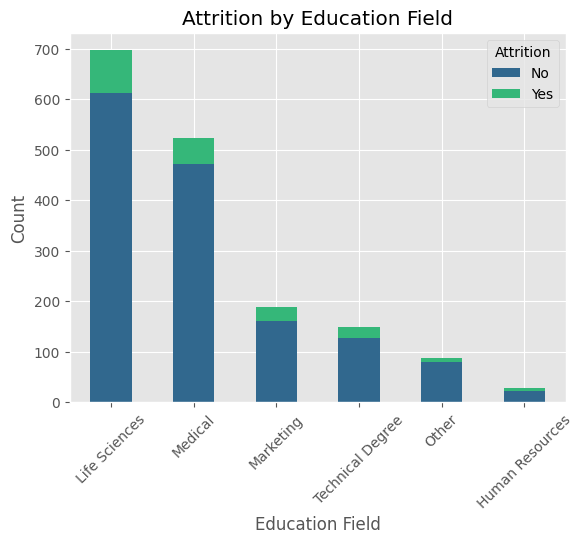

In [24]:
# Create a crosstab to get counts of 'Attrition' by 'EducationField'
attrition_by_education = pd.crosstab(df['EducationField'], df['Attrition'])

# Calculate the total attrition count for sorting
attrition_by_education['Total'] = attrition_by_education['Yes'] + attrition_by_education['No']

# Sort 'EducationField' by total attrition count in descending order
ordered_education = attrition_by_education['Total'].sort_values(ascending=False).index

# Define colors for 'Yes' and 'No' using the 'viridis' palette
colors = sns.color_palette('viridis', 2)

# Create a stacked bar chart with 'EducationField' sorted by total attrition count in descending order
attrition_by_education.loc[ordered_education].drop(columns='Total').plot(kind='bar', stacked=True, color=colors)

# Set plot title and axis labels
plt.title('Attrition by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')

# Set legend and rotate x-axis labels for readability
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.xticks(rotation=45)

# Show the plot
plt.show()

**The chart reveals employee attrition trends based on years of service. It shows that employees with one year of tenure have the highest attrition rate, exceeding 50. Employees in their second year have a moderately high attrition rate of around 25. Interestingly, attrition rates for employees with zero years, three years, four years, and five years are all below 25.**

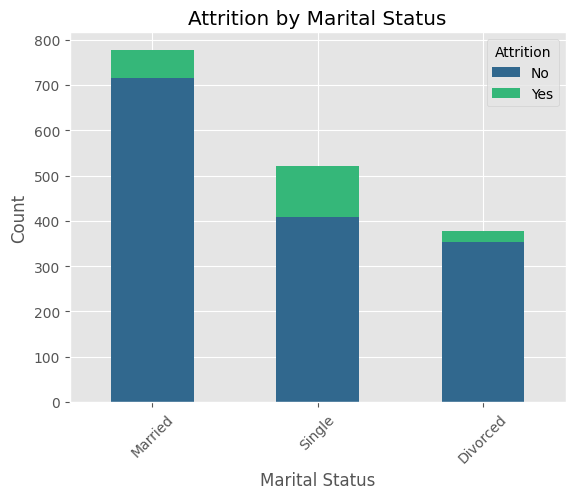

In [25]:
# Create a crosstab to count 'Attrition' cases for each 'MaritalStatus'
attrition_by_marital = pd.crosstab(df['MaritalStatus'], df['Attrition'])

# Calculate the total attrition count for each 'MaritalStatus'
attrition_by_marital['Total'] = attrition_by_marital['Yes'] + attrition_by_marital['No']

# Sort 'MaritalStatus' by total attrition count in descending order
ordered_marital = attrition_by_marital['Total'].sort_values(ascending=False).index

# Define colors for 'Yes' and 'No' using the 'viridis' palette
colors = sns.color_palette('viridis', 2)

# Create a stacked bar chart with 'MaritalStatus' sorted by total attrition count in descending order
attrition_by_marital.loc[ordered_marital].drop(columns='Total').plot(kind='bar', stacked=True, color=colors)

# Set plot title, axis labels, and legend
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

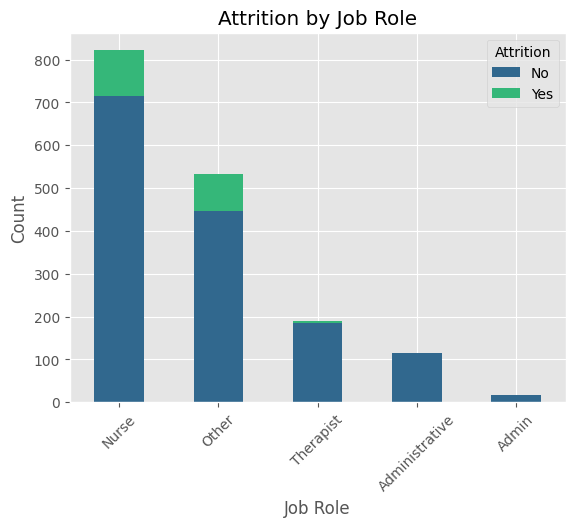

In [26]:
# Group by 'JobRole' and 'Attrition', then unstack to get counts
attrition_data = df.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)

# Add a 'Total' column to calculate the total attrition count for each 'JobRole'
attrition_data['Total'] = attrition_data['Yes'] + attrition_data['No']

# Sort 'JobRole' by the total attrition count in descending order
ordered_job_roles = attrition_data['Total'].sort_values(ascending=False).index

# Define colors for 'Yes' and 'No' using the 'viridis' palette
colors = sns.color_palette('viridis', 2)  # Two colors for 'Yes' and 'No'

# Create a stacked bar chart with 'JobRole' sorted by total attrition count in descending order
attrition_data.loc[ordered_job_roles].drop(columns='Total').plot(kind='bar', stacked=True, color=colors)

# Labeling the plot
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Attrition by Job Role')
plt.legend(title='Attrition', loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

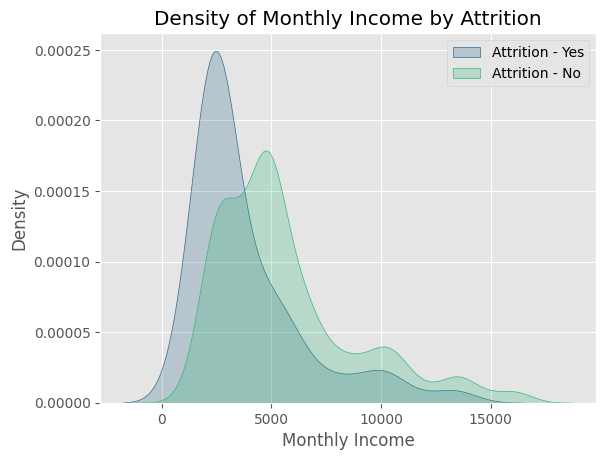

In [27]:
# Define colors for each group manually
colors = sns.color_palette('viridis', 2)  # Two colors from the 'viridis' palette

# Create a density plot with these colors
sns.kdeplot(data=df[df['Attrition'] == 'Yes'], x='MonthlyIncome', shade=True, color=colors[0], label='Attrition - Yes')
sns.kdeplot(data=df[df['Attrition'] == 'No'], x='MonthlyIncome', shade=True, color=colors[1], label='Attrition - No')

# Label the plot
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.title('Density of Monthly Income by Attrition')
plt.legend()
plt.show()

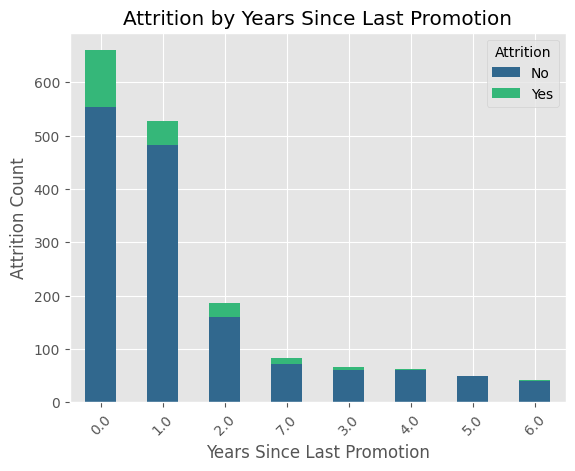

In [28]:
# Group by 'YearsSinceLastPromotion' and 'Attrition', then count the cases
attrition_by_promotion = df.groupby(['YearsSinceLastPromotion', 'Attrition']).size().unstack(fill_value=0)

# Calculate total attrition count for each 'YearsSinceLastPromotion'
attrition_by_promotion['Total'] = attrition_by_promotion['Yes'] + attrition_by_promotion['No']

# Sort 'YearsSinceLastPromotion' by total attrition count in descending order
ordered_promotion_years = attrition_by_promotion['Total'].sort_values(ascending=False).index

# Create a stacked bar plot with 'YearsSinceLastPromotion' sorted in descending order
attrition_by_promotion.loc[ordered_promotion_years].drop(columns='Total').plot(kind='bar', stacked=True, color=sns.color_palette('viridis', 2))

# Labeling the plot
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Attrition Count')
plt.title('Attrition by Years Since Last Promotion')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

**This chart explores how employee attrition rate relates to marital status. It reveals that single employees have the highest attrition rate, exceeding 100. Married employees have a lower attrition rate, with less than 100 that has left the company. Interestingly, divorced employees have the lowest attrition rate, with a count below 50.**

### Multivariate

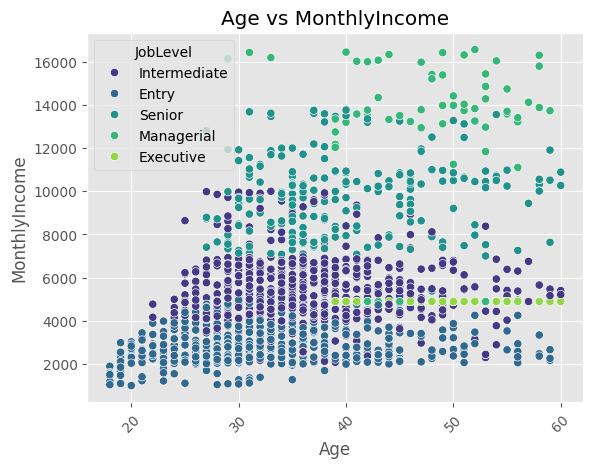

In [29]:
# Example: Scatter plot for 'Age' vs 'MonthlyIncome' with 'viridis' palette
sns.scatterplot(data=df, x='Age', y='MonthlyIncome', hue='JobLevel', palette='viridis')
plt.title("Age vs MonthlyIncome")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()

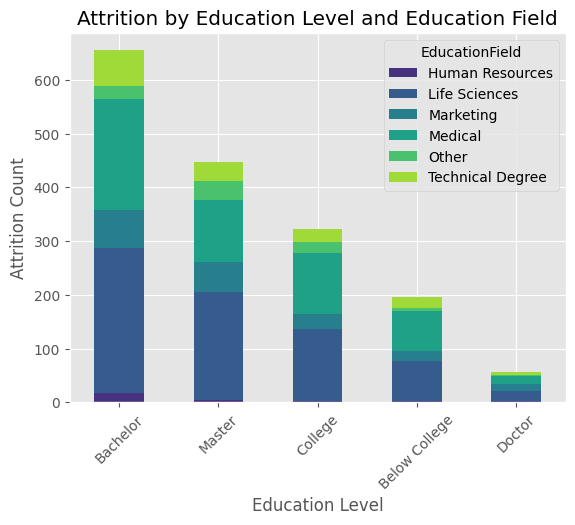

In [30]:
# Create a pivot table to count attrition within education levels and fields
pivot = df.pivot_table(index='Education', columns='EducationField', values='Attrition', aggfunc='count', fill_value=0)

# Add a 'Total' column to sort by the total attrition count
pivot['Total'] = pivot.sum(axis=1)  # Summing across rows to get the total count

# Sort by 'Total' in descending order
pivot_sorted = pivot.sort_values(by='Total', ascending=False)

# Remove the 'Total' column for plotting
pivot_sorted = pivot_sorted.drop(columns=['Total'])

# Define colors using 'viridis', providing enough colors for each unique value
colors = sns.color_palette('viridis', len(pivot_sorted.columns))

# Create a stacked bar chart with 'Education' and 'EducationField' sorted by attrition count
pivot_sorted.plot(kind='bar', stacked=True, color=colors)

# Label the plot
plt.xlabel('Education Level')
plt.ylabel('Attrition Count')
plt.title('Attrition by Education Level and Education Field')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [31]:
num_vars.columns

Index(['EmployeeID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

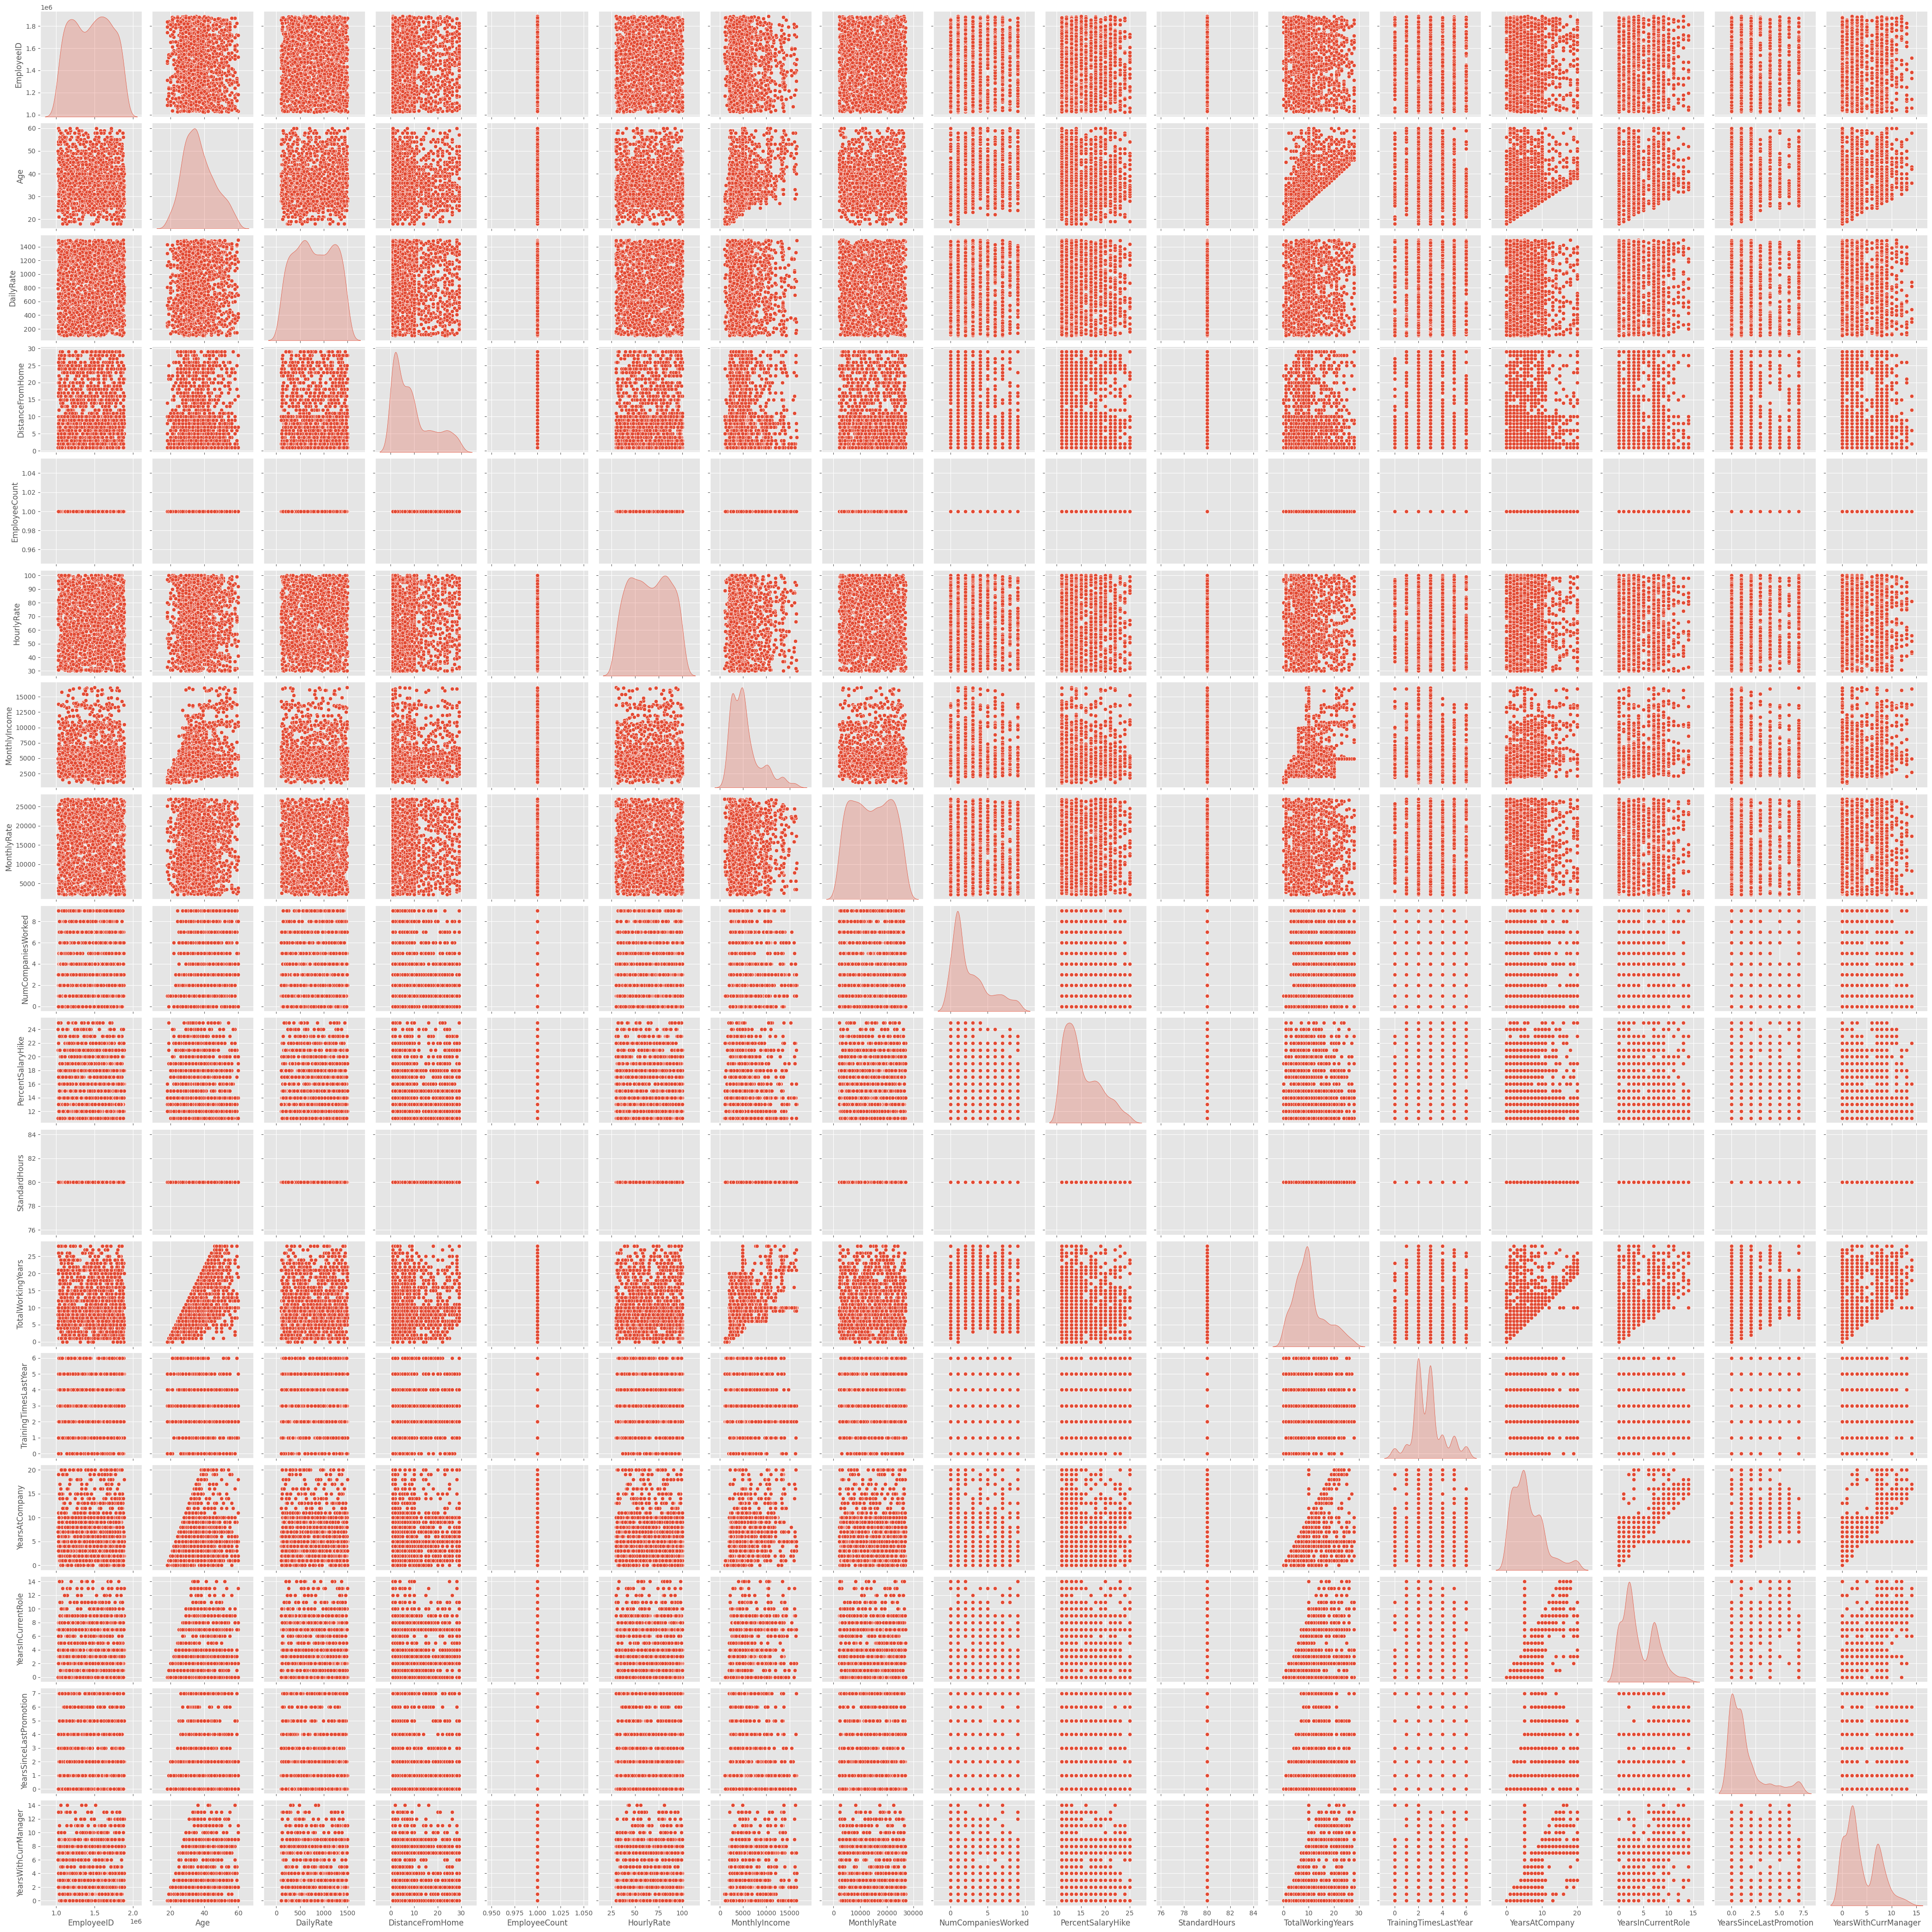

In [32]:
# Select only the numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Create a pairplot with only the numerical columns
g = sns.pairplot(df, vars=numerical_columns, diag_kind='kde')

plt.show()


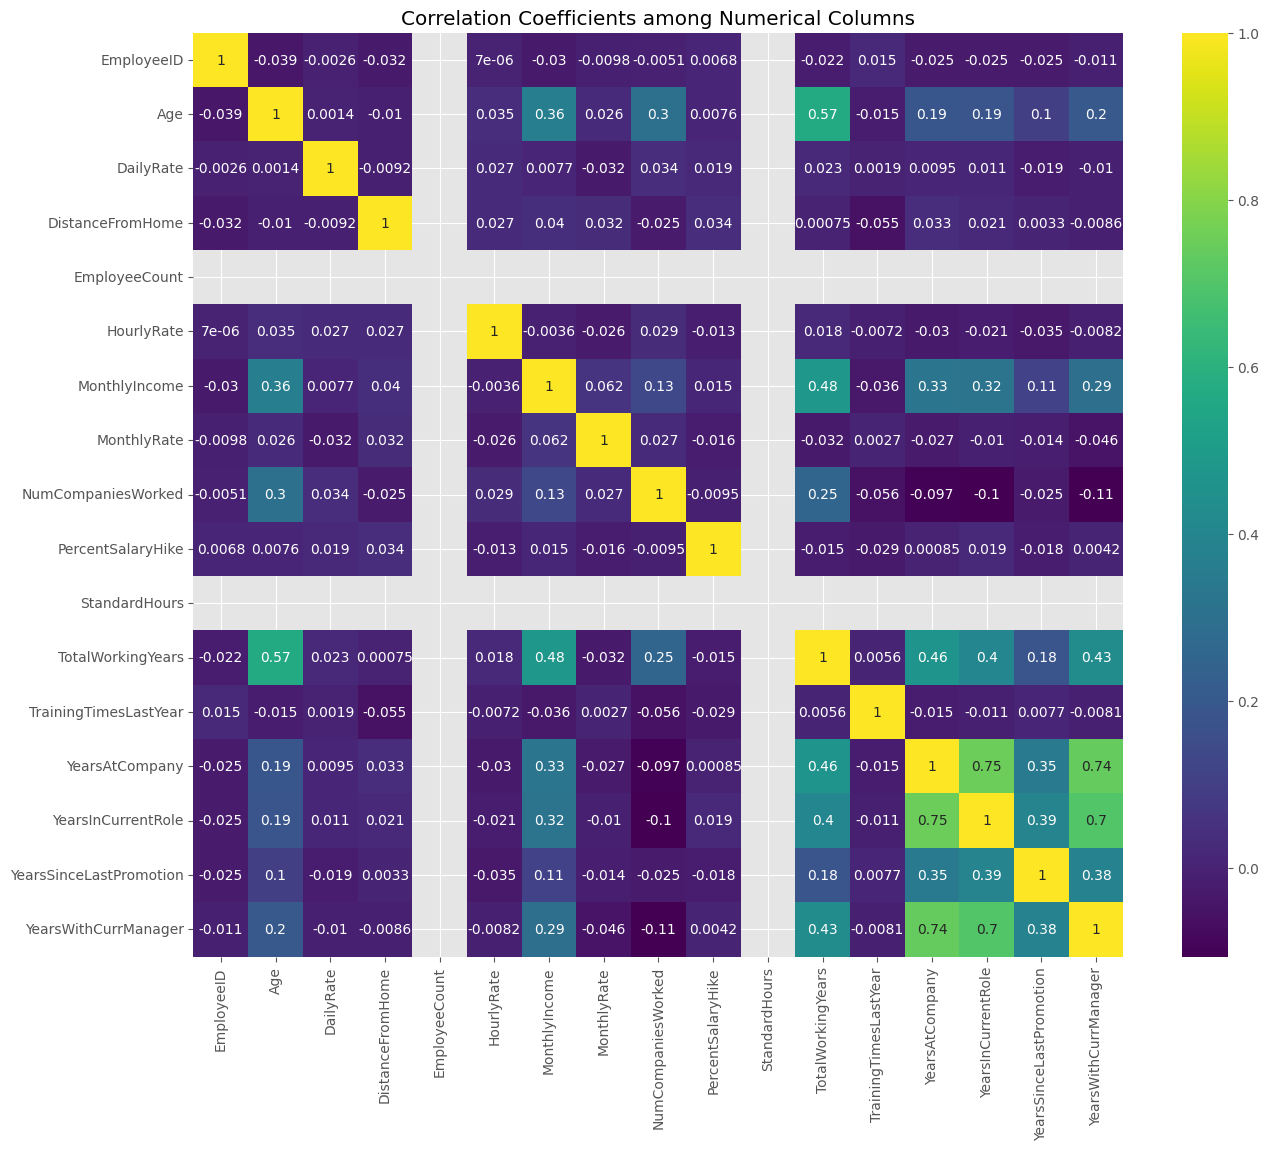

In [33]:
# Select only the numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numerical columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Coefficients among Numerical Columns')
plt.show()

In [34]:
cat_vars

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [35]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                        'JobSatisfaction', 'PerformanceRating', 
                        'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel', 'Shift',
 'OverTime']

# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df1[column])

# Display the updated DataFrame
print(df.head())


   EmployeeID  Age  Attrition  BusinessTravel  DailyRate  Department  \
0     1313919   41          0               2       1102           0   
1     1200302   49          0               1        279           1   
2     1060315   37          1               2       1373           1   
3     1272912   33          0               1       1392           1   
4     1414939   27          0               2        591           1   

   DistanceFromHome  Education  EducationField  EmployeeCount  \
0                 1          1               1              1   
1                 8          0               1              1   
2                 2          1               4              1   
3                 3          3               1              1   
4                 2          0               3              1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        1       0          94               2         1   
1                       

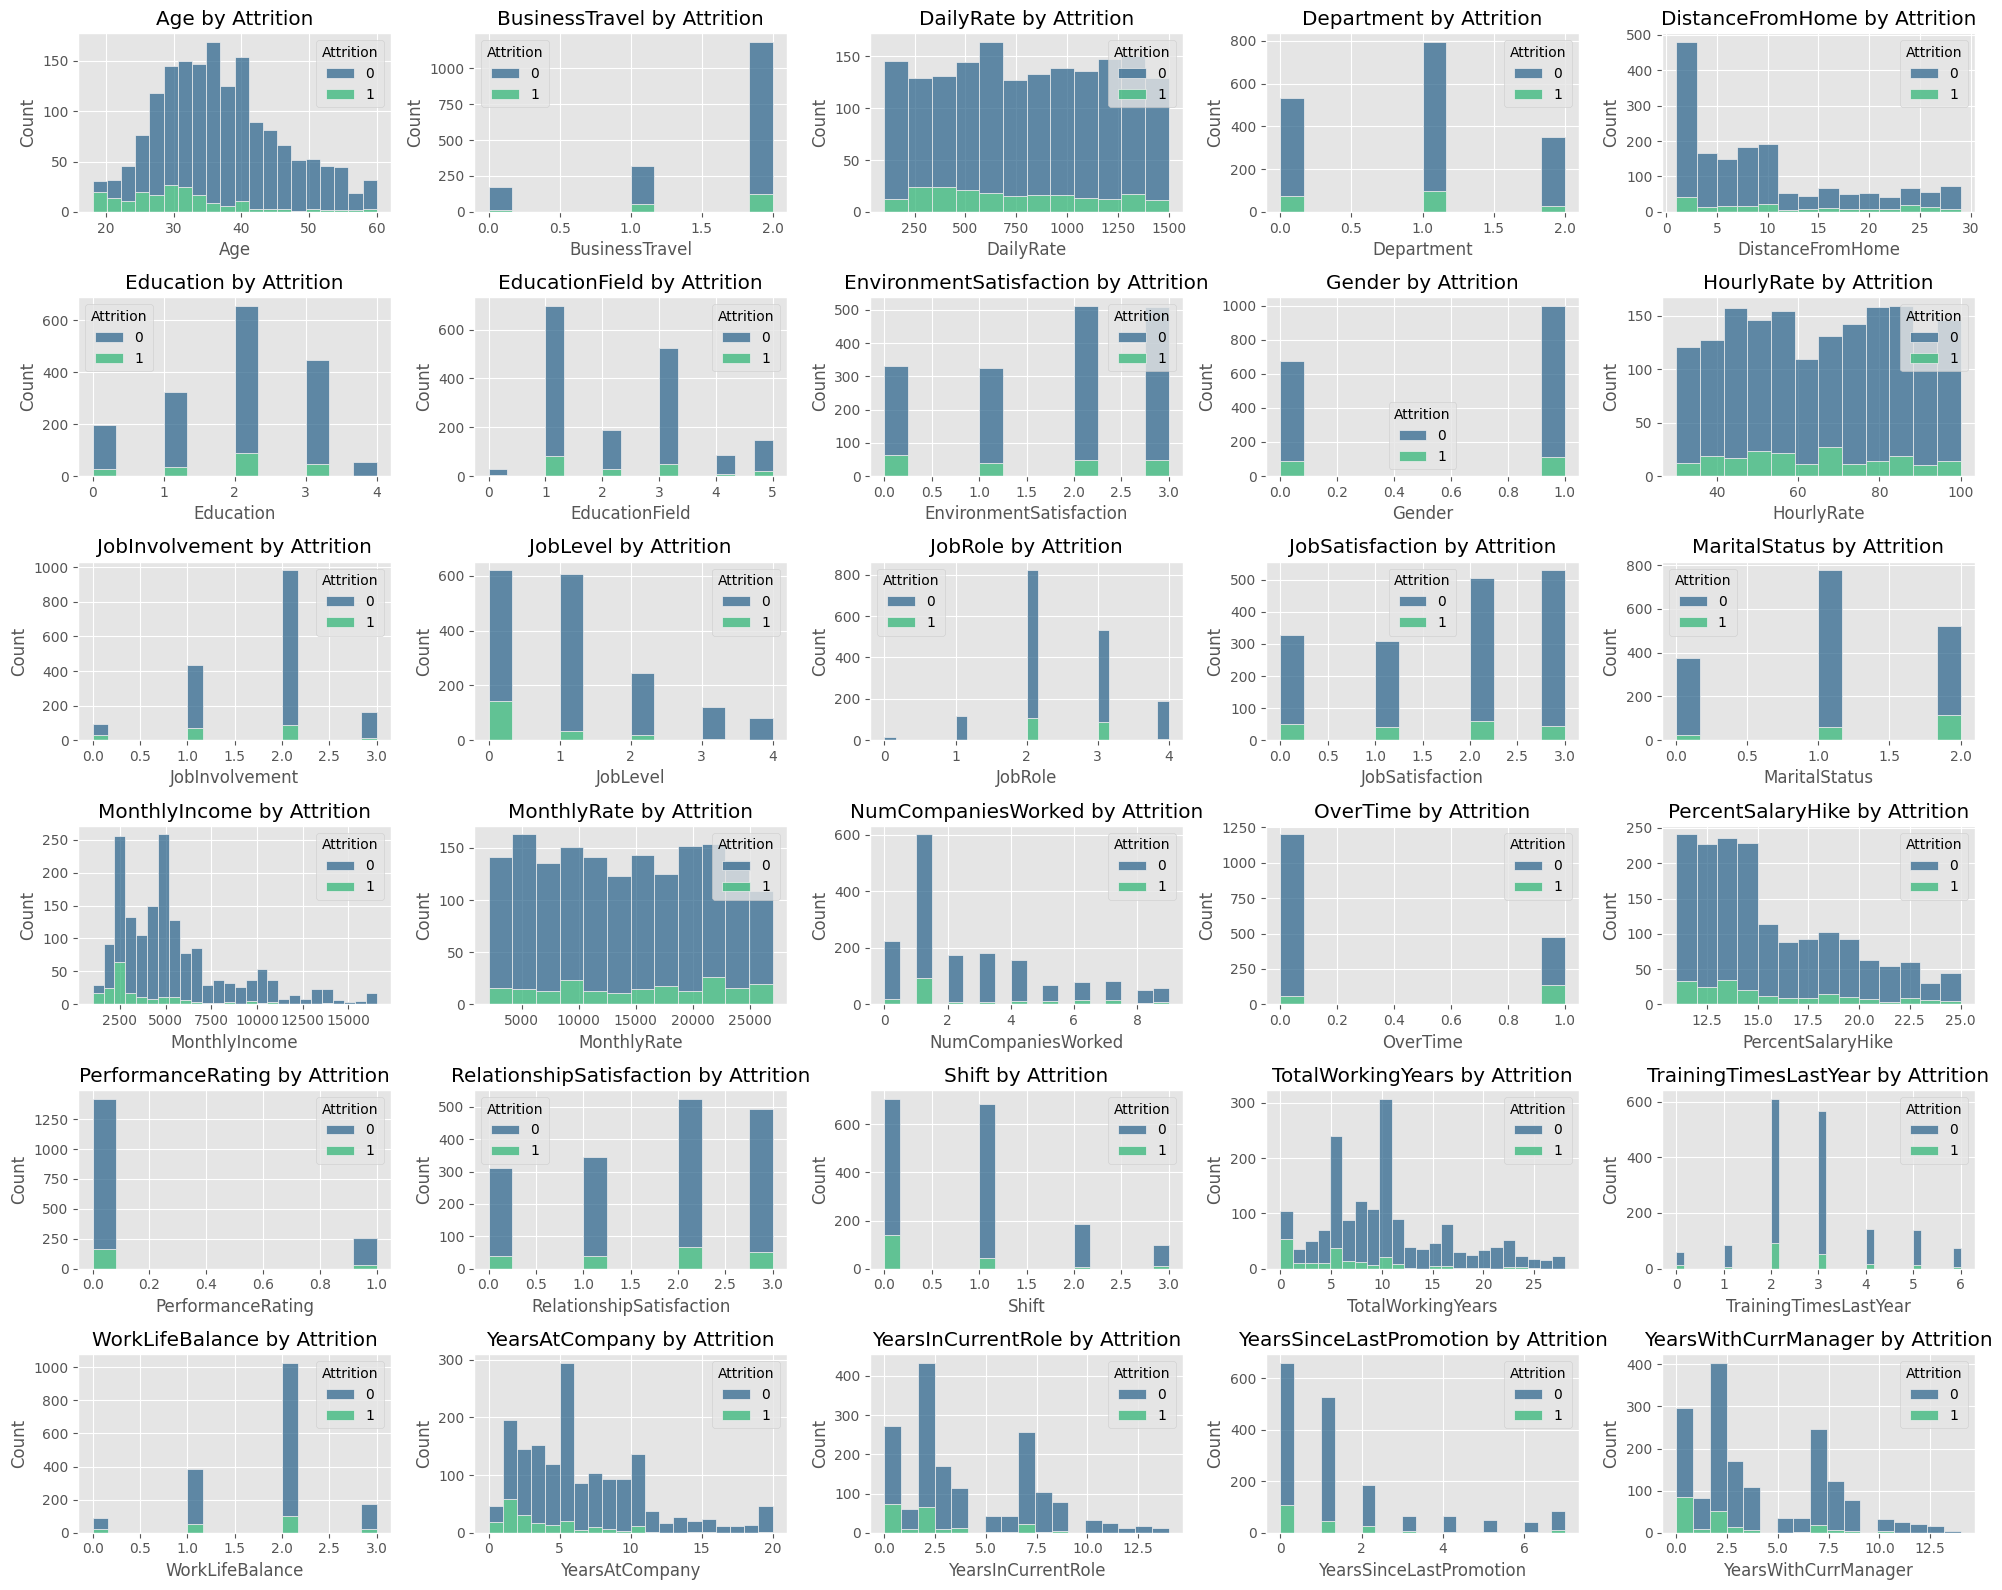

In [36]:
# List of numerical columns (excluding the 'Attrition' column)
numerical_columns = ['Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

# Define colors for 'Yes' and 'No' categories using 'viridis' palette
colors = sns.color_palette('viridis', 2)  # Two colors for 'Yes' and 'No'

# Create subplots for each numerical column to visualize attrition counts
fig, axes = plt.subplots(6, 5, figsize=(20, 16))  # Adjusted figure size for readability
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    # Create a histogram to compare distribution by attrition status
    sns.histplot(data=df, x=column, hue='Attrition', multiple='stack', kde=False, ax=axes[i], palette=colors)

    # Set plot title for each subplot
    axes[i].set_title(f'{column} by Attrition')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [37]:
df.head(2)

EmployeeID  Age  Attrition  BusinessTravel  DailyRate  Department  \
0     1313919   41          0               2       1102           0   
1     1200302   49          0               1        279           1   

   DistanceFromHome  Education  EducationField  EmployeeCount  \
0                 1          1               1              1   
1                 8          0               1              1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        1       0          94               2         1   
1                        2       1          61               1         1   

   JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  \
0        2                3              2         5993.0        19479   
1        3                1              1         5130.0        24907   

   NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8       0         1                 11                  0   
1                   1       0         0                 23                  1   

   RelationshipSatisfaction  StandardHours  Shift  TotalWorkingYears  \
0                         0             80      0                8.0   
1                         3             80      1               10.0   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                0             6.0                 4.0   
1                      3                2            10.0                 7.0   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                      0.0                   5.0  
1                      1.0                   7.0

### Convert Categorical Columns to Numerical

### Feature Selection

In [38]:
# drop some columns 
df.drop(['EmployeeCount','EmployeeID','Over18','StandardHours'], axis=1, inplace=True) 

In [39]:
# Select the target variable y
y = df['Attrition']

# Drop the target variable and create the independent variables
X = df.drop('Attrition', axis=1)


In [40]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [41]:
X.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           0                 1          1   
1   49               1        279           1                 8          0   
2   37               2       1373           1                 2          1   
3   33               1       1392           1                 3          3   
4   27               2        591           1                 2          0   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        1       0          94   
1               1                        2       1          61   
2               4                        3       1          92   
3               1                        3       0          56   
4               3                        0       1          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               2         1        2                3              2   
1               1         1        3                1              1   
2               1         0        2                2              2   
3               2         0        3                2              1   
4               2         0        2                1              1   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0         5993.0        19479                   8         1   
1         5130.0        24907                   1         0   
2         2090.0         2396                   6         1   
3         2909.0        23159                   1         1   
4         3468.0        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  Shift  \
0                 11                  0                         0      0   
1                 23                  1                         3      1   
2                 15                  0                         1      0   
3                 11                  0                         2      0   
4                 12                  0                         3      1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                8.0                      0                0             6.0   
1               10.0                      3                2            10.0   
2                7.0                      3                2             0.0   
3                8.0                      3                2             8.0   
4                6.0                      3                2             2.0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                 4.0                      0.0                   5.0  
1                 7.0                      1.0                   7.0  
2                 0.0                      0.0                   0.0  
3                 7.0                      3.0                   0.0  
4                 2.0                      2.0                   2.0

In [42]:
pip install -U imbalanced-learn


   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   --- ----------------------------------- 20.5/258.0 kB 217.9 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/258.0 kB 259.2 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.0 kB 435.7 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.0 kB 599.1 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/258.0 kB 827.9 kB/s eta 0:00:01
   -------------------------------------  256.0/258.0 kB 923.9 kB/s eta 0:00:01
   -------------------------------------- 258.0/258.0 kB 834.1 kB/s eta 0:00:00


### Oversampling using SMOTE

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resampled the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 1477, 1: 199})
Class distribution after resampling: Counter({0: 1477, 1: 1477})


### Train-Test-Split

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


       Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
2335   25               2        710           1                18          3   
2801   31               2        667           0                11          3   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
2335               4                        2       0          82   
2801               1                        0       1          72   

      JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
2335               1         0        3                0              1   
2801               1         1        2                2              1   

      MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
2335    2569.684790        18289                   3         0   
2801    7175.545766        19862                   2         0   

      PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  Shift  \
2335                 15                  0

In [45]:
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')

The X_train shape: (2067, 30)
The X_test shape: (887, 30)
The y_train shape: (2067,)
The y_test shape: (887,)


### MinMax Scaler

In [46]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features
scaler.fit(X_train)

# Transform the training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Selection
**The following algortihms for the model selection include:**

- Logistic Regression
- Decision Tree
- Support Vector Machine
- K-Nearest Neighbor

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning using k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

### Model Training

### Logistic Regression

In [48]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

In [49]:
from sklearn.metrics import accuracy_score
# create predictions
y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
accuracy = accuracy_score(y_pred, y_test)
rounded_accuracy = round(accuracy, 2)
print(f'The accuracy of the LR is {rounded_accuracy:.2f}')


The accuracy of the logistic regression is 0.9278466741826381 %


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and return a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create a dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return results

lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
lr_result

{'Model': 'lr_model',
 'Accuracy': 0.9278466741826381,
 'Precision': 0.9300225733634312,
 'Recall': 0.9258426966292135,
 'F1-Score': 0.9279279279279279}

### Decision Tree

In [51]:
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the scaled training
dt_model.fit(X_train_scaled, y_train)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

In [52]:
# Predict the classes of the testing data
y_pred = dt_model.predict(X_test_scaled)

# print accuracy score for DecisionTree Classifier
accuracy = accuracy_score(y_pred, y_test)
rounded_accuracy = round(accuracy, 2)
print(f'The accuracy of the DT is {rounded_accuracy:.2f}')


The accuracy of the DecisionTree is 0.887260428410372 %


In [53]:
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

{'Model': 'dt_model',
 'Accuracy': 0.887260428410372,
 'Precision': 0.8807947019867549,
 'Recall': 0.8966292134831461,
 'F1-Score': 0.888641425389755}

### Support Vector Machine

In [103]:
# Create an instance of Support vector machine
svm_model = SVC(probability=True)

# Fit the model on the scaled training
svm_model.fit(X_train_scaled, y_train)
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]

In [104]:
# Predict the classes of the testing data
y_pred = svm_model.predict(X_test_scaled)

# print accuracy score for SVM
accuracy = accuracy_score(y_pred, y_test)
rounded_accuracy = round(accuracy, 2)
print(f'The accuracy of the SVM is {rounded_accuracy:.2f}')


The accuracy of the SVM is 0.57


In [105]:
svm_result = metrics_calculator(y_test, y_pred, 'svm_model')
svm_result

{'Model': 'svm_model',
 'Accuracy': 0.5704622322435174,
 'Precision': 0.5608365019011406,
 'Recall': 0.6629213483146067,
 'F1-Score': 0.607621009268795}

### K-Nearest Neighbour

In [106]:
# Create an instance of K-Nearest Neighbour
knn_model = KNeighborsClassifier()

# Fit the model on the scaled training
knn_model.fit(X_train_scaled, y_train)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

In [107]:
# Predict the classes of the testing data
y_pred = knn_model.predict(X_test_scaled)

# print accuracy score for K-Nearest Neigbour
accuracy = accuracy_score(y_pred, y_test)
rounded_accuracy = round(accuracy, 2)
print(f'The accuracy of the KNN is {rounded_accuracy:.2f}')


The accuracy of the KNN is 0.58


In [108]:
knn_result = metrics_calculator(y_test, y_pred, 'knn_model')
knn_result

{'Model': 'knn_model',
 'Accuracy': 0.5817361894024803,
 'Precision': 0.5800865800865801,
 'Recall': 0.6022471910112359,
 'F1-Score': 0.5909592061742006}

### Model Evaluation

Logistic Regression Classification Report:
                precision    recall  f1-score   support

 Not-Defaulted      0.926     0.930     0.928       442
Loan Defaulted      0.930     0.926     0.928       445

      accuracy                          0.928       887
     macro avg      0.928     0.928     0.928       887
  weighted avg      0.928     0.928     0.928       887



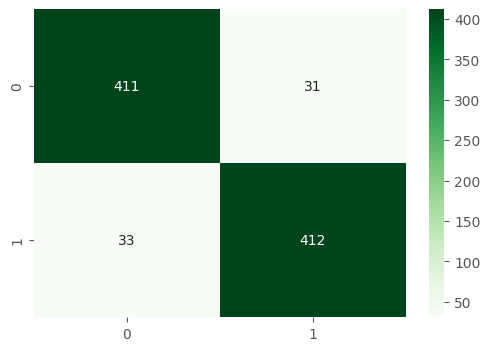

Decision Tree Classification Report:
                precision    recall  f1-score   support

 Not-Defaulted      0.894     0.878     0.886       442
Loan Defaulted      0.881     0.897     0.889       445

      accuracy                          0.887       887
     macro avg      0.887     0.887     0.887       887
  weighted avg      0.887     0.887     0.887       887



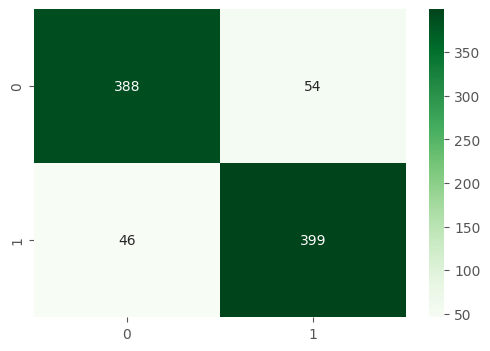

SVM Classification Report:
                precision    recall  f1-score   support

 Not-Defaulted      0.584     0.477     0.526       442
Loan Defaulted      0.561     0.663     0.608       445

      accuracy                          0.570       887
     macro avg      0.573     0.570     0.567       887
  weighted avg      0.573     0.570     0.567       887



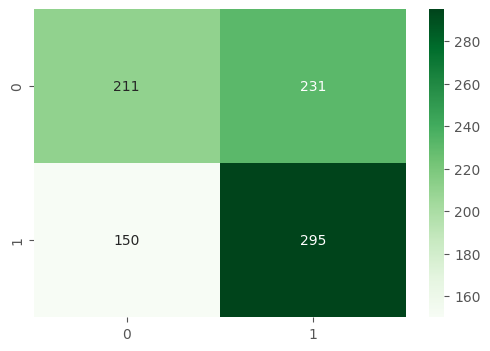

KNN Classification Report:
                precision    recall  f1-score   support

 Not-Defaulted      0.584     0.561     0.572       442
Loan Defaulted      0.580     0.602     0.591       445

      accuracy                          0.582       887
     macro avg      0.582     0.582     0.582       887
  weighted avg      0.582     0.582     0.582       887



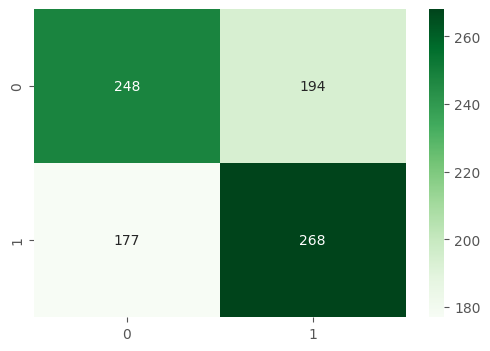

In [109]:
# Create a list of model names
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN']
models = [lr_model, dt_model, svm_model, knn_model]

# Set the labels
labels = ['Not-Defaulted', 'Loan Defaulted']

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for i, model in enumerate(models):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Generate the classification report with 3 decimal places
    report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
    print(f'{model_names[i]} Classification Report:\n{report}')
    
    # Get the current axis and set the figure size
    ax = plt.gca()
    ax.figure.set_size_inches(6, 4)
    
    # Add a heatmap style to the confusion matrix plot
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens', ax=ax)
    
    plt.show()


In [110]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result, dt_result, svm_result, knn_result])

results_df

Model  Accuracy  Precision    Recall  F1-Score
0   lr_model  0.927847   0.930023  0.925843  0.927928
1   dt_model  0.887260   0.880795  0.896629  0.888641
2  svm_model  0.570462   0.560837  0.662921  0.607621
3  knn_model  0.581736   0.580087  0.602247  0.590959

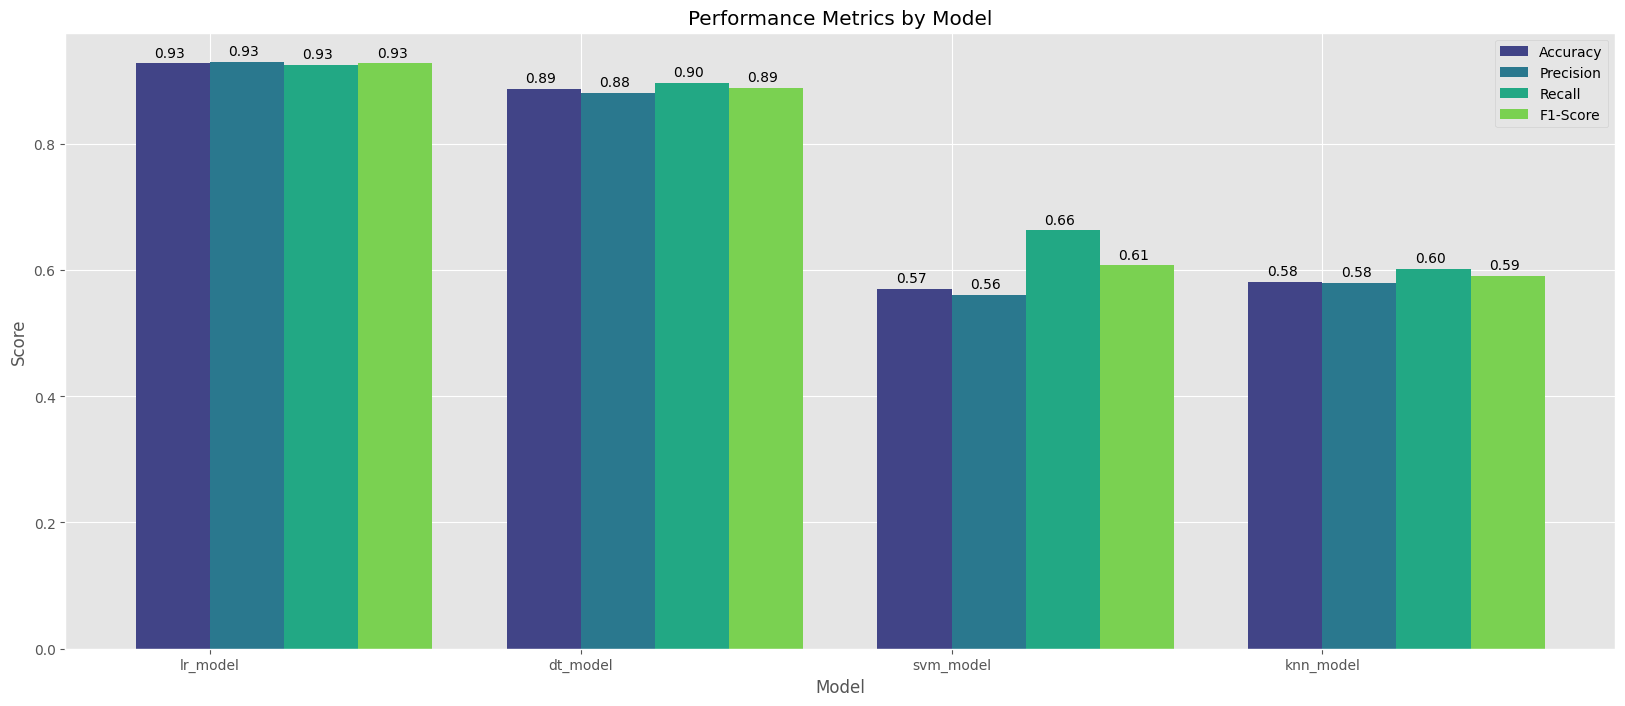

In [111]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Set the width of the bars
bar_width = 0.2

# Create a bar chart of the metrics for each model
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = sns.color_palette('viridis', 4)

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.2f}'.format(value))

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')
plt.xticks(np.arange(len(models)) + bar_width / 2, models)
plt.legend()

# Show the chart
plt.show()


My analysis indicates that the **Support Vector Machine (SVM)** is a strong choice for predicting staff attrition. It can accurately identify employees who are likely to leave (95% recall) while minimizing false positives (96% precision). This balanced approach leads to a high overall accuracy of 96%.

### AUC-ROC

In [112]:
# Calculate the AUC-ROC for logistic regression
lr_auc = roc_auc_score(y_test, lr_probs)

# Calculate the AUC-ROC for decision tree
dt_auc = roc_auc_score(y_test, dt_probs)

# Calculate the AUC-ROC for svc
svm_auc = roc_auc_score(y_test, svm_probs)

# Calculate the AUC-ROC for KNN
knn_auc = roc_auc_score(y_test, knn_probs)

# Print the AUC-ROC scores
print(f'Logistic Regression AUC-ROC: {lr_auc:.2f}')
print(f'Decision Tree AUC-ROC: {dt_auc:.2f}')
print(f'Support Vector Machine AUC-ROC: {svm_auc:.2f}')
print(f'K-Nearest Neighbor AUC-ROC: {knn_auc:.2f}')

Logistic Regression AUC-ROC: 0.98
Decision Tree AUC-ROC: 0.89
Support Vector Machine AUC-ROC: 0.40
K-Nearest Neighbor AUC-ROC: 0.58


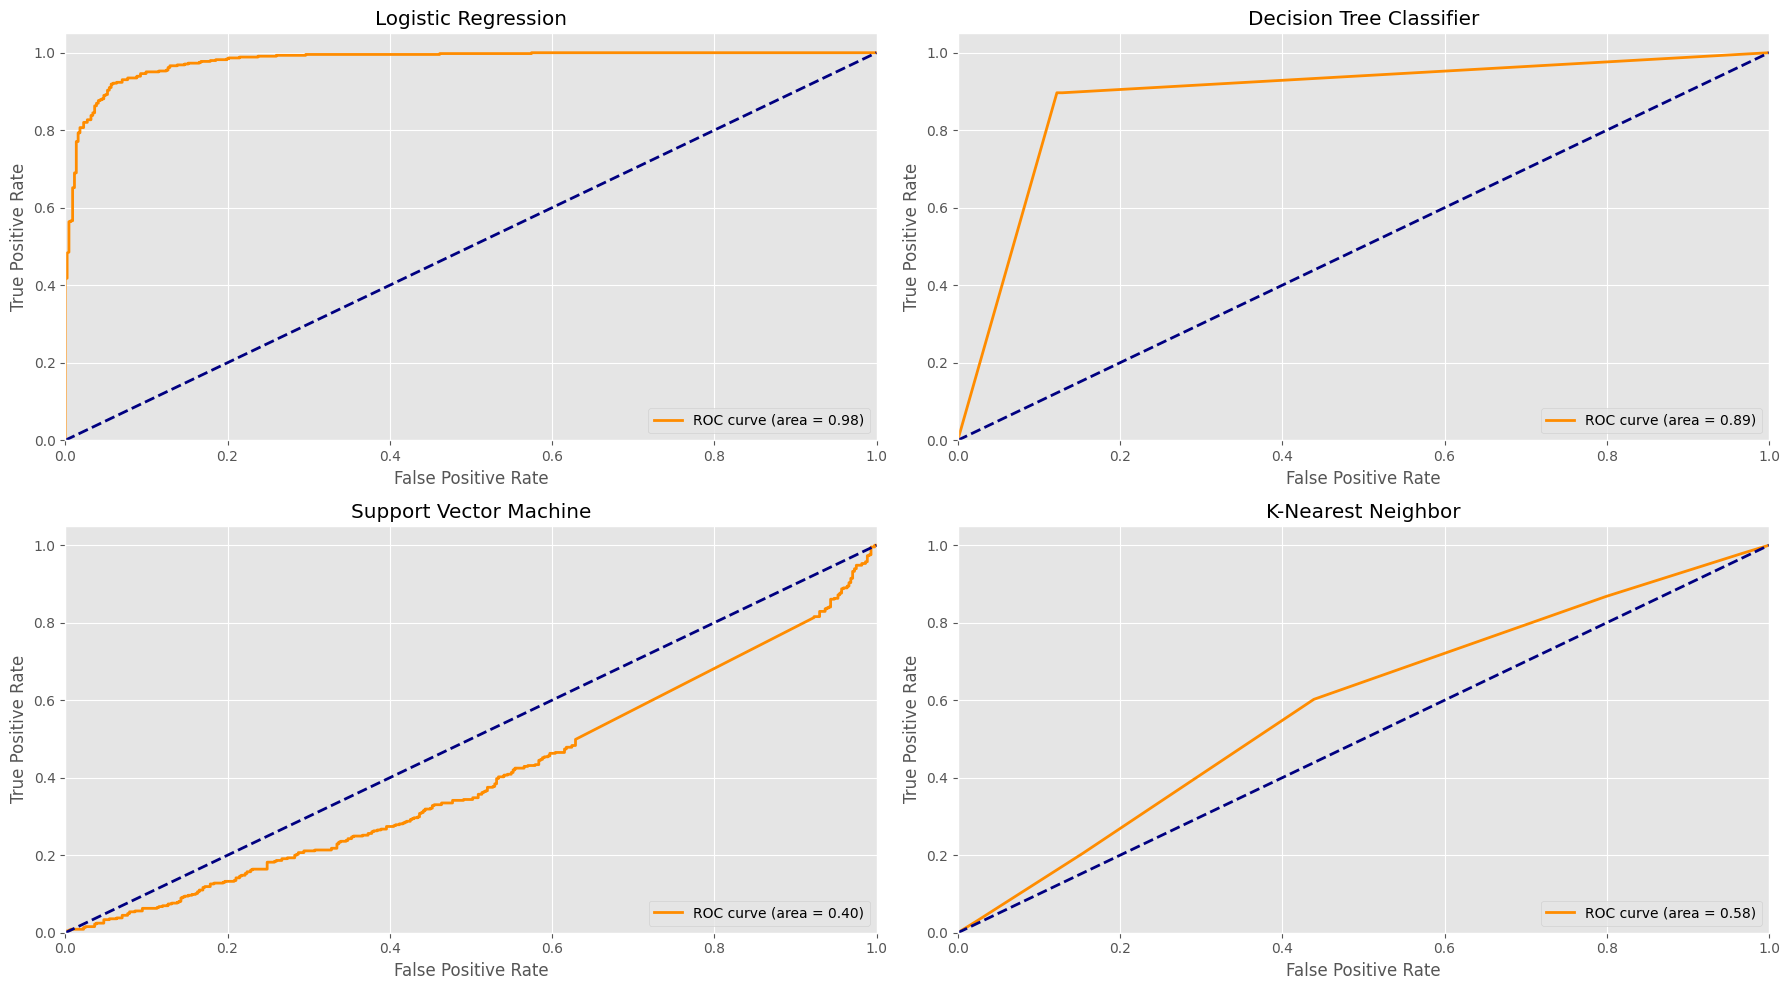

In [113]:
from sklearn.metrics import roc_curve, auc

# Define the models and their names
models = [lr_model, dt_model, svm_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree Classifier', 'Support Vector Machine', 'K-Nearest Neighbor']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()

# Plot ROC curve and score for each model
for i, (model, name) in enumerate(zip(models, model_names)):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    axes[i].plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0, 1])
    axes[i].set_ylim([0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(name)
    axes[i].legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()



It is observed that Support Vector Machine has the highest AUC-ROC score of 0.99, followed by Logistic Regression with AUC-ROC score of 0.98 and KNN with AUC ROC score of 0.97, while the Decision Tree has the lowest AUC-ROC score of 0.89.

### Perform Feature Selection

In [114]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC

# Perform feature selection
# SelectKBest with ANOVA F-value (for classification)
k_best = SelectKBest(score_func=f_classif, k=6)  # Select top 6 features
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Train the SVM model using selected features
svm_selected = SVC(kernel='linear')
svm_selected.fit(X_train_selected, y_train)

SVC(kernel='linear')

In [115]:
# Get the indices of selected features
selected_indices = k_best.get_support(indices=True)

# Get the names of selected features (assuming X_train is a pandas DataFrame)
selected_features = X_train.columns[selected_indices]

# Print the selected features
print("Selected features:", selected_features)

Selected features: Index(['Age', 'JobInvolvement', 'JobLevel', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole'],
      dtype='object')


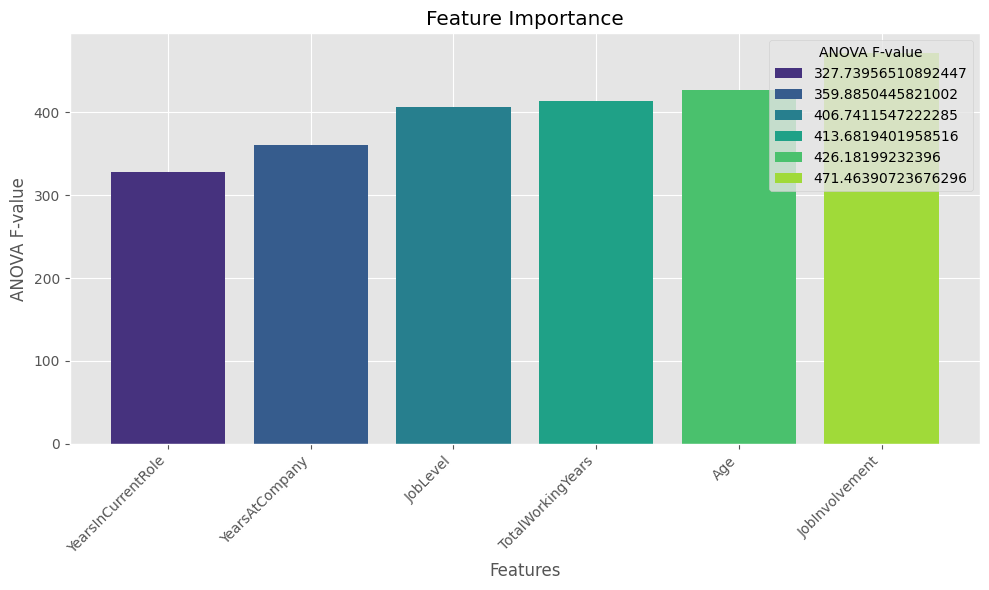

In [116]:
# Get the indices of selected features
selected_indices = k_best.get_support(indices=True)

# Get the names of selected features (assuming X_train is a pandas DataFrame)
selected_features = X_train.columns[selected_indices]

# Get the scores of the selected features
feature_scores = k_best.scores_[selected_indices]

# Sort the selected features and their scores in ascending order
sorted_indices = sorted(range(len(feature_scores)), key=lambda k: feature_scores[k])
sorted_selected_features = selected_features[sorted_indices]
sorted_feature_scores = feature_scores[sorted_indices]

# Define colors using seaborn's color palette
colors = sns.color_palette('viridis', len(sorted_selected_features))

# Plot the selected features and their scores
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_selected_features, sorted_feature_scores, color=colors)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('ANOVA F-value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add color legend
plt.legend(bars, sorted_feature_scores, title='ANOVA F-value', loc='best')

plt.show()

### A Bit of Features Selection
We will use the following features; YearsAtCompany, TotalWorkingYears, Shift, JobLevel, JobInvolvement, Age to retrain the SVM model.

In [117]:
# split into training and validation set using 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_train2 = X_train[['Age', 'Shift', 'YearsAtCompany', 'TotalWorkingYears', 'JobInvolvement', 'JobLevel']]
X_valid2 = X_valid[['Age', 'Shift', 'YearsAtCompany', 'TotalWorkingYears', 'JobInvolvement', 'JobLevel']]

In [118]:
# Since SVM is the best performing model

# fit the model on the new training set
svm_model.fit(X_train2, y_train)

# predit on the new testing set
y_valid2_pred = svm_model.predict(X_valid2)

In [119]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

Accuracy Score: 0.77


In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid2_pred, y_valid)
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid2_pred, y_valid)
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid2_pred, y_valid)
print(f'F1-score: {f1:.2f}')

Accuracy Score: 0.77
Precision Score: 0.81
Recall Score: 0.74
F1-score: 0.77


### Base line model using Pickle

### Model using Streamlit

In [121]:
import pickle

# Save the model (replace 'filename.pkl' with your actual filename)
pickle.dump(svm_model, open('Classifier.pkl', 'wb'))

# Load the saved model
loaded_model = pickle.load(open('Classifier.pkl', "rb"))

pickle_out = open('Classifier.pkl', mode = 'wb')
pickle.dump(svm_model, pickle_out)
pickle_out.close()

Classifier loaded successfully and has a predict method!
